# Dynamic Experiments

<h1>Dynamic Experiments</h1>

<p>
<b>Quantitative Big Imaging - ETHZ: 227-0966-00L</b>
<br />
</p>
<br />
<p style="font-size:1em;">April 29, 2021</p>
<br /><br />
<p style="font-size:1.5em;padding-bottom: 0.25em;">Anders Kaestner</p>  
<p style="font-size:1em;">Laboratory for Neutron Scattering and Imaging<br />Paul Scherrer Institut</p>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from   skimage.morphology import label
from   skimage.measure import regionprops
import pandas as pd

from skimage.feature import corner_peaks, corner_harris, BRIEF
from skimage.transform import warp, AffineTransform
from skimage import data
from skimage.io import imread
import numpy as np
import pydot

%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

## Literature / Useful References

### Books
- John C. Russ, “The Image Processing Handbook”,(Boca Raton, CRC Press)
 - Available [online](http://dx.doi.org/10.1201/9780203881095) within domain ethz.ch (or proxy.ethz.ch / public VPN) 
- A. Ardeshir Goshtasby, Image Registration Principles, Tools and Methods (Springer Verlag) [online](http://dx.doi.org/10.1007/978-1-4471-2458-0)


### Papers / Sites

- Comparsion of Tracking Methods in Biology
 - Chenouard, N., Smal, I., de Chaumont, F., Maška, M., Sbalzarini, I. F., Gong, Y., … Meijering, E. (2014). Objective comparison of particle tracking methods. Nature Methods, 11(3), 281–289. doi:10.1038/nmeth.2808
 - Maska, M., Ulman, V., Svoboda, D., Matula, P., Matula, P., Ederra, C., … Ortiz-de-Solorzano, C. (2014). A benchmark for comparison of cell tracking algorithms. Bioinformatics (Oxford, England), btu080–. doi:10.1093/bioinformatics/btu080
- Keypoint and Corner Detection
 - Distinctive Image Features from Scale-Invariant Keypoints - https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
 - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
- Registration
 - https://itk.org/ITKSoftwareGuide/html/Book2/ITKSoftwareGuide-Book2ch3.html
- Multiple Hypothesis Testing
 - Coraluppi, S. & Carthel, C. Multi-stage multiple-hypothesis tracking.
J. Adv. Inf. Fusion 6, 57–67 (2011).
 - Chenouard, N., Bloch, I. & Olivo-Marin, J.-C. Multiple hypothesis
tracking in microscopy images. in Proc. IEEE Int. Symp. Biomed. Imaging
1346–1349 (IEEE, 2009).

- Keypoint and Corner Detection
 - Distinctive Image Features from Scale-Invariant Keypoints - https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf
 - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html


 
## Previously on QBI ...

- Image Enhancment 
 - Highlighting the contrast of interest in images
 - Minimizing Noise
- Understanding image histograms
- Automatic Methods
- Component Labeling
- Single Shape Analysis
- Complicated Shapes
- Distribution Analysis

## Quantitative "Big" Imaging


The course has covered imaging enough and there have been a few quantitative metrics, but "big" has not really entered.

What does __big__ mean?

- Not just / even large
- it means being ready for _big data_
- The three V's
    - volume, 
    - velocity, 
    - variety 
- scalable, fast, easy to customize

## So what is "big" imaging

- doing analyses in a disciplined manner
 - fixed steps
 - easy to regenerate results
 - no _magic_
- having everything automated
 - 100 samples is as easy as 1 sample
- being able to adapt and reuse analyses
 - one really well working script and modify parameters
 - different types of cells
 - different regions

# Imaging of dynamic experiments

## What is a dynamic process?
- Relating to objects in motion 
- Characterized by continuous change, activity, or progress

## Real time 
- The actual time during which a process or event
occurs.
- (Computing) of or relating to a system in which input data is processed within milliseconds so that it is available virtually immediately as feedback.

##  Imaging
Imaging is the capture, storage, manipulation, and display of images.

## Experiments
1. What sort of dynamic experiments do we have?
1. How can we design good dynamic experiments?

<table>
    <tr><th>Continuous</th><th>Repetetive</th></tr>
    <tr><td><img src="figures/rolling-dice.jpg" style="height:200px"></td>
        <td><img src="figures/on-the-swings.jpg" style="height:200px"></td>        
    </tr>
</table>

```{figure} figures/rolling-dice.jpg
---
scale: 50%
---
Contiuous processes evolve over time without guarantee that it returns to the same point.
```
```{figure} figures/on-the-swings.jpg
---
scale: 50%
---
Repetetive processes always behaves the same with a given frequency.
```

## Image analysis
1. How can we track objects between points?
1. How can we track shape?
1. How can we track distribution?
1. How can we track topology?
1. How can we track voxels?
1. How can we assess deformation and strain?
1. How can assess more general cases?

__$\rightarrow$ How does this help answering your questions?__

## Outline

- Motivation (Why and How?)
- Scientific Goals

### Experiments

- Simulations
- Experiment Design
 

## Pixel/Voxel-based Methods
 - Cross Correlation
 - DIC
 - DIC + Physics
 - Affine Tranfroms
 - Non-rigid transform

### Keypoint Detection
- Corner Detectors
- SIFT/SURF
- Tracking from Keypoints
 
## General Problems
 - Thickness - Lung Tissue
 - Curvature - Metal Systems
 - Two Point Correlation - Volcanic Rock

# Motivation

- 3D images are already difficult to interpret on their own
- 3D movies (4D) are almost impossible 

<video controls loop src="movies/dk31_foam.mp4" height="300px" type="video/mp4"></video>

## 2D movies can also be challenging

They are 3D - x,y,t

### Example: a water jet
<video controls loop src="movies/WaterJet.m4v" height="100px" type="video/mp4"></video>

### Example: [coffee making](https://youtu.be/VESMU7JfVHU)
<img src="figures/MokaTimeSeries.png" style="height:300px" />

## What information are you looking for?
We can say that it looks like, but many pieces of quantitative information are difficult to extract
- How fast is it going?
- How many particles are present?
- Are their sizes constant?
- Are some moving faster?
- Are they rearranging?

## 3D Reconstruction

### Tomography
One of the most commonly used scans in the hospital is called a computed tomography scan. 

This scan works by creating 2D X-ray projections in a number of different directions in order to determine what the 3D volume looks like
<img src="figures/ct_scan.gif" style="height:300px"/>

```{figure} figures/ct_scan.png
---
---
Some views from a CT scan of a patient
```

### Stage Tilting
Beyond just tracking we can take multiple frames of a still image and instead of looking for changes in the object, we can change the angle. The pollen image below shows this for SEM
<img src="figures/pollen.gif"/>

```{figure} figures/pollen.png
---
---
A tilt series of a pollen grain.
```

## Scientific Goals of dynamic experiments

### Rheology

Understanding the flow of liquids and mixtures is important for many processes
- blood movement in arteries, veins, and capillaries
- oil movement through porous rock
- air through dough when baking bread
- magma and gas in a volcano


### Deformation

Deformation is similarly important since it plays a significant role in the following scenarios

- red blood cell lysis in artificial heart valves
- microfractures growing into stress fractures in bone
- toughening in certain wood types

# Dynamic experiments
The first step of any of these analyses is proper experimental design. 
Since there is always:

- A limited field of view
- A voxel size
- A maximum rate of measurements
- Dose limitations
    - Sample damage
    - Limited flux
- A non-zero cost for each measurement

<img src="figures/time-vs-resolution.png" style="height:200px">

There are always trade-offs to be made between 
- getting the best possible high-resolution nanoscale dynamics 
- and capturing the system level behavior.

```{figure} figures/time-vs-resolution.png
---
scale: 50%
---
The trade-off between time and resoultion.
```

## Factors affecting the image quality

- Process speed
- Spatial resolution
- Intensity dynamics

<img src="figures/slow-water.jpg" style="height:300px"/>

### Example
You have a dose limited experiment 
- 100$\mu{}$m pixels
- 1s Exposure time
- 800 neutrons per pixel

To maintain the SNR you have to

||Smaller pixels| Higher frame-rate|
|:---|:---:|:---:|
|__Modification__|Longer exposure time| Larger pixels|


### Rebinning

Rebinning or using larger pixels can be used to improve the SNR.

<br/>
<img src="figures/slow-water_partbinned.jpg" style="height:400px">
<br/>

__...but you may miss small details__

### Frame rates

<table>
<tr><th>Sampling rates</th><th>Piecewise constant</th></tr>
<tr><td><img src="figures/sampling.png" style="height:200px"/></td><td><img src="figures/piecewise_constant.png" style="height:200px"/></td></tr>
</table>

## Planning dynamic experiments
<table>
<tr><td>
    
### If we measure too fast
 - sample damage
 - miss out on long term changes
 - have noisy data
 
### Too slow
 - miss small, rapid changes
 - blurring and other motion artifacts
 
### Too high resolution
 - not enough unique structures in field of view to track
 
### Too low resolution
 - not sensitive to small changes
    
</td><td>
<img src="figures/DynamicExperimentsTradeOffs.png" style="height:600px"/>    
</td></tr>
</table>

```{figure} figures/DynamicExperimentsTradeOffs.png
---
scale: 80%
---
Factors contributing to the deciding how to perform a dynamic experiment.
```

### Simple processes

<img src="figures/timeseries_visualization_sequence.svg" style="height:200px"/>


#### Capillary rise
We want to study capillary rise and [Washbourne's equation](https://en.wikipedia.org/wiki/Washburn%27s_equation)

_Analysis steps_
- Extract y-t slices
- Segment the front
- Locate the front as function of time
- Plot as function of $\sqrt{t}$ 
<table>
    <tr><th>Movie</th><th>y-t slice</th><th>Analysis</th></tr>
<tr><td><video controls loop src="movies/CapillaryRise.mp4" type="video/mp4" height="350px"></video></td>
    <td><img src="figures/capillary_rise_yt.png" style="height:350px"></td><td><img src="figures/capillary_rise_plot.png" style="height:350px"></td></tr>
</table>

## Tuning experiment by simulation

### In many cases: 
- experimental data is inherited 
- little can be done about the design, 

### When there is still the opportunity to tune the experiment
simulations provide a powerful tool for tuning and balancing a large number parameters

### Validation
Simulations also provide the ability to pair post-processing to the experiments and determine the limits of tracking.

## What do we start with?

Going back to our original cell image

1. We have been able to _get rid of the noise_ in the image and _find all the cells_ (__lecture 2-4__)
1. We have analyzed the shape of the cells using the shape tensor (__lecture 5__)
1. We even _separated cells_ joined together using Watershed (__lecture 6__)
1. We have created even more _metrics characterizing the distribution_ (__lecture 7__)

We have at least a few samples (or different regions), large number of metrics and an almost as large number of parameters to _tune_


### How do we do something meaningful with it?

# A basic simulation


We start with a starting image with a number of circles on a plane

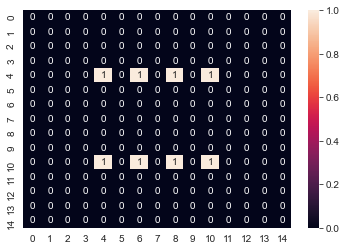

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 15),
                     np.linspace(-1.5, 1.5, 15))

N_DISK_ROW = 2
N_DISK_COL = 4
DISK_RAD = 0.15
disk_img = np.zeros(xx.shape, dtype=int)
for x_cent in 0.7*np.linspace(-1, 1, N_DISK_COL):
    for y_cent in 0.7*np.linspace(-1, 1, N_DISK_ROW):
        c_disk = np.sqrt(np.square(xx-x_cent)+np.square(yy-y_cent)) < DISK_RAD
        disk_img[c_disk] = 1
fig, ax1 = plt.subplots(1, 1)

sns.heatmap(disk_img, annot=True, fmt='d', ax=ax1);

## Create a series of moving "cells"

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)

s_img = disk_img.copy()
img_list = [s_img]
for i in range(4):
    s_img = np.roll(s_img, -1, axis=1)
    s_img = np.roll(s_img, -1, axis=0)
    img_list += [s_img]

def update_frame(i):
    plt.cla()
    sns.heatmap(img_list[i],annot=True,
                fmt="d",cmap='nipy_spectral',
                ax=c_ax,cbar=False,
                vmin=0,vmax=1)
    c_ax.set_title('Iteration #{}'.format(i+1))

# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=len(img_list),
                          interval=1000, repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

## Analysis
The analysis of the series requires the following steps:
1. Threshold
2. Component Label
3. Shape Analysis
4. Distribution Analysis

... and to put all in a data frame

In [7]:
all_objs = []
for frame_idx, c_img in enumerate(img_list):       # For each time frame
    lab_img = label(c_img > 0)                     # Label the items
    for c_obj in regionprops(lab_img):             # Put region properties for each object of the time frame
        all_objs += [dict(label=int(c_obj.label),  
                          y=c_obj.centroid[0],
                          x=c_obj.centroid[1],
                          area=c_obj.area,
                          frame_idx=frame_idx)]
        
all_obj_df = pd.DataFrame(all_objs)                # Create a Pandas data frame with all the properties
all_obj_df.head(5)                                 # Look at the first five rows of the data frame

,label,y,x,area,frame_idx
0,1,4.0,4.0,1,0
1,2,4.0,6.0,1,0
2,3,4.0,8.0,1,0
3,4,4.0,10.0,1,0
4,5,10.0,4.0,1,0


## Looking at the positions of the items in all frames

Here, we look at the positions of the items found in each time frame. The information comes from the data frame we just created. We only use position and frame index here.

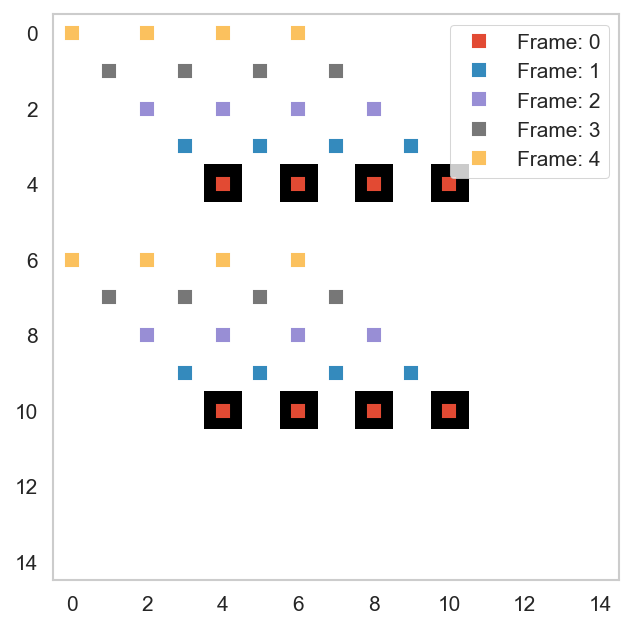

In [8]:
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.imshow(disk_img, cmap='bone_r')
for frame_idx, c_rows in all_obj_df.groupby('frame_idx'):
    c_ax.plot(c_rows['x'], c_rows['y'], 's', label='Frame: %d' % frame_idx)
c_ax.legend();

# Describing Motion
We can describe the motion in the above example with a simple vector

$$ \vec{v}(\vec{x})=\langle -1,-1 \rangle $$


This is a very simple case of motion as it only follows a straight line towards the upper left corner. Motion in real experiments are much more complicated and it can also ambiguous which item is which when the trajectories are crossing.

# Scoring Tracking

In the following examples we will use simple metrics for scoring fits where the objects are matched and the number of misses is counted.

There are a number of more sensitive scoring metrics which can be used, 
by finding the best submatch for a given particle since the number of matches and particles does not always correspond. 

See the papers at the beginning for more information

# Tracking methods

While there exist a number of different methods and complicated approaches for tracking. 

For experimental design it is best to start with the 
- simplest
- easiest understood 
method. 

The limits of this can be found and components added as needed until it is possible to realize the experiment

---
_If a dataset can only be analyzed with a multiple-hypothesis testing neural network model then it might not be so reliable_

---

# Tracking using Nearest Neighbor

We then return to _nearest neighbor_ which means we track 
- a point ($\vec{P}_0$) from an image ($I_0$) at $t_0$ 
- to a point ($\vec{P}_1$) in image ($I_1$) at $t_1$ 

by 

$$ \vec{P}_1=\textrm{argmin}(||\vec{P}_0-\vec{y}||  \;\forall \vec{y}\in I_1) $$

# Distances between objects

The plot below shows the distances from each object to all other objects. Without additional information like
- we are looking for the nearest neighbor
- or the expected displacement is bounded within some limits.
- shape characteristics of the items

It is impossible to tell which is the matching object between frame 0 and 1.

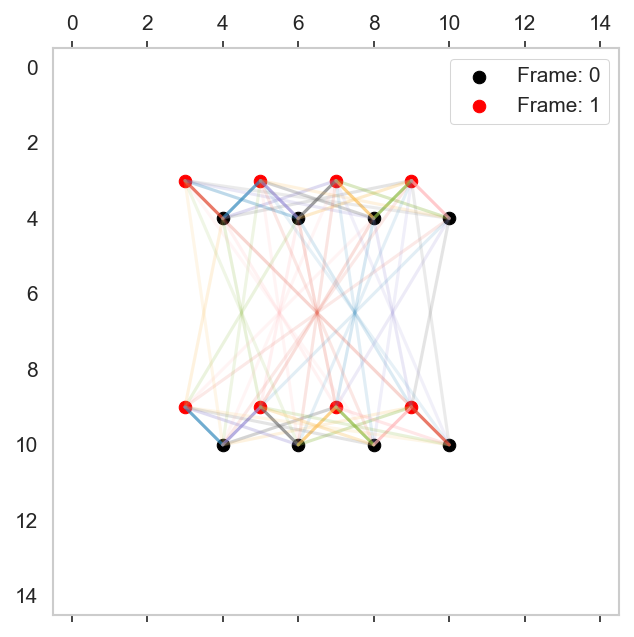

In [9]:
frame_0 = all_obj_df[all_obj_df['frame_idx'].isin([0])]
frame_1 = all_obj_df[all_obj_df['frame_idx'].isin([1])]
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.matshow(1 < disk_img , cmap='gist_yarg')
c_ax.scatter(frame_0['x'], frame_0['y'], c='black', label='Frame: 0')
c_ax.scatter(frame_1['x'], frame_1['y'], c='red', label='Frame: 1')
dist_df_list = []
for _, row_0 in frame_0.iterrows():
    for _, row_1 in frame_1.iterrows():
        seg_dist = np.sqrt(np.square(row_0['x']-row_1['x']) +
                           np.square(row_0['y']-row_1['y']))
        c_ax.plot([row_0['x'], row_1['x']],
                  [row_0['y'], row_1['y']], '-', alpha=1/seg_dist)
        dist_df_list += [dict(x0=row_0['x'],
                              y0=row_0['y'],
                              lab0=int(row_0['label']),
                              x1=row_1['x'],
                              y1=row_1['y'],
                              lab1=int(row_1['label']),
                              dist=seg_dist)]
c_ax.legend();

## Put the distances in a data frame

In [10]:
dist_df = pd.DataFrame(dist_df_list)
dist_df.head(5)

,x0,y0,lab0,x1,y1,lab1,dist
0,4.0,4.0,1,3.0,3.0,1,1.414214
1,4.0,4.0,1,5.0,3.0,2,1.414214
2,4.0,4.0,1,7.0,3.0,3,3.162278
3,4.0,4.0,1,9.0,3.0,4,5.099020
4,4.0,4.0,1,3.0,9.0,5,5.099020


In [11]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.matshow(disk_img > 1, cmap='gist_yarg')
c_ax.scatter(frame_0['x'], frame_0['y'], c='black', label='Frame: 0')
c_ax.scatter(frame_1['x'], frame_1['y'], c='red', label='Frame: 1')

def update_frame(i):
    # plt.cla()
    c_rows = dist_df.query('lab0==%d' % i)
    for _, c_row in c_rows.iterrows():
        c_ax.quiver(c_row['x0'], c_row['y0'],
                    c_row['x1']-c_row['x0'],
                    c_row['y1']-c_row['y0'], scale=1.0, scale_units='xy', angles='xy',
                    alpha=1/c_row['dist'])
    c_ax.set_title('Point #{}'.format(i+1))



# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=np.unique(dist_df['lab0']),
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

With the nearest neighbor criterion we still have the problem because most items have two possible next position. 

### Looking at the nearest points found

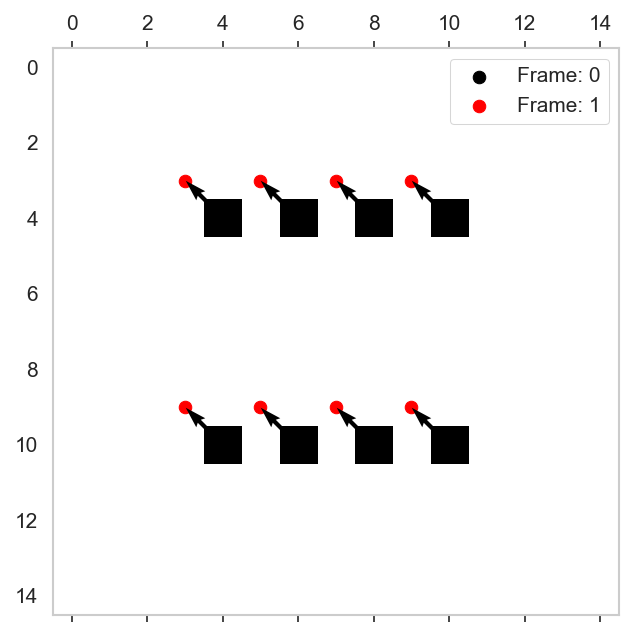

In [12]:
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.matshow(disk_img >= 1,cmap='gist_yarg')
c_ax.scatter(frame_0['x'], frame_0['y'], c='black', label='Frame: 0')
c_ax.scatter(frame_1['x'], frame_1['y'], c='red', label='Frame: 1')
for _, c_rows in dist_df.groupby('lab0'):
    _, c_row = next(c_rows.sort_values('dist').iterrows())
    c_ax.quiver(c_row['x0'], c_row['y0'],
                c_row['x1']-c_row['x0'],
                c_row['y1']-c_row['y0'],
                scale=1.0, scale_units='xy', angles='xy')
    
c_ax.legend();

### Tracking in all frames

This tracking seems to be success full. The reason is that we were lucky that the direction is -1,-1. On the other hand, it is relatively rare that you have perfect positioning of the items and therefore this ambiguity doesn't happen very often.

In [13]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.matshow(disk_img >= 1,cmap='gist_yarg')


def draw_timestep(i):
    # plt.cla()
    frame_0 = all_obj_df[all_obj_df['frame_idx'].isin([i])]
    frame_1 = all_obj_df[all_obj_df['frame_idx'].isin([i+1])]
    c_ax.scatter(frame_0['x'], frame_0['y'], c='black', label='Frame: %d' % i)
    c_ax.scatter(frame_1['x'], frame_1['y'],
                 c='red', label='Frame: %d' % (i+1))
    dist_df_list = []
    for _, row_0 in frame_0.iterrows():
        for _, row_1 in frame_1.iterrows():
            dist_df_list += [dict(x0=row_0['x'],
                                  y0=row_0['y'],
                                  lab0=int(row_0['label']),
                                  x1=row_1['x'],
                                  y1=row_1['y'],
                                  lab1=int(row_1['label']),
                                  dist=np.sqrt(
                                      np.square(row_0['x']-row_1['x']) +
                                      np.square(row_0['y']-row_1['y'])))]
    dist_df = pd.DataFrame(dist_df_list)
    for _, c_rows in dist_df.groupby('lab0'):
        _, best_row = next(c_rows.sort_values('dist').iterrows())
        c_ax.quiver(best_row['x0'], best_row['y0'],
                    best_row['x1']-best_row['x0'],
                    best_row['y1']-best_row['y0'],
                    scale=1.0, scale_units='xy', angles='xy')
    c_ax.set_title('Frame #{}'.format(i+1))


# write animation frames
anim_code = FuncAnimation(fig,
                          draw_timestep,
                          frames=all_obj_df['frame_idx'].max(),
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

# Key Points (or feature points)
 - Tracking and registration using the full data set is time demaning.
 - We can detect feature points in an image and use them to make a registration. 

The key points located at characteristic positions around the obejct and their positions relative to each other are invariant to translation and rotation. The points will still be at the same features when the object is skewed, but then they obtain new relative positions compared to the original.

## Identifying key points
We first focus on the detection of points. 
- Corners are of most interest. 

Many methods have been proposed to [detect corners](https://en.wikipedia.org/wiki/Corner_detection). A [Harris corner detector](https://en.wikipedia.org/wiki/Harris_Corner_Detector) helps us here:

The Harris corner detector uses the structure tensor to identify corner points in the image. In the checkerboard example below we identify the corners using the Harris corner detector. In the corner feature image in the middle you see that the corners/crossings provide a strong response. The feature image is thresholded to provide the corner points, which are plotted in the panel to the right.

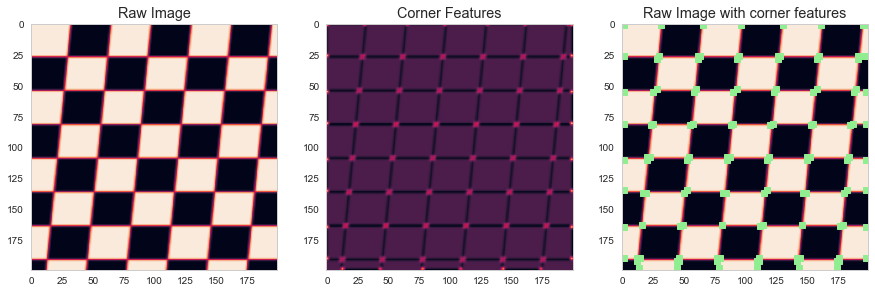

In [14]:
# %matplotlib inline
tform = AffineTransform(scale=(1.3, 1.1), rotation=0, shear=0.1,
                        translation=(0, 0))
image = warp(data.checkerboard(), tform.inverse, output_shape=(200, 200))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(image); ax1.set_title('Raw Image')
ax2.imshow(corner_harris(image)); ax2.set_title('Corner Features')
peak_coords = corner_peaks(corner_harris(image),threshold_rel=0)
ax3.imshow(image); ax3.set_title('Raw Image with corner features')
ax3.plot(peak_coords[:, 1], peak_coords[:, 0], 's',color='lightgreen');

## Let's try the corner detection on real data

We return to the bone image we have use many times before and test the Harris detector to identify key points in a natural image.

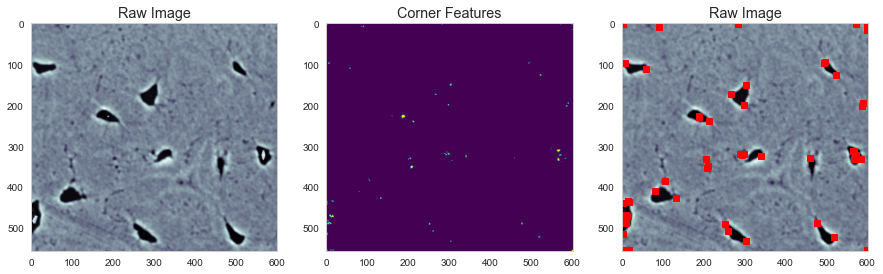

In [15]:
full_img = imread("figures/bonegfiltslice.png").mean(axis=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(full_img,cmap='bone')
ax1.set_title('Raw Image')
ax2.imshow(1.5e7<corner_harris(full_img),cmap='viridis'), ax2.set_title('Corner Features')
peak_coords = corner_peaks(corner_harris(full_img),threshold_rel=0.002)

ax3.imshow(full_img,cmap='bone'), ax3.set_title('Raw Image')
ax3.plot(peak_coords[:, 1], peak_coords[:, 0], 'rs');

# Tracking with Points

__Goal:__ To reducing the tracking efforts

We can use the corner points to track features between multiple frames. 

In this sample, we see that they are 
 - quite stable 
 - and fixed 
     
on the features.

## We need data - a series transformed images

In this example we apply different affine transformations like
- Translation in x and y
- Rotation 
- Shear

to see how well the Harris detector copes with these. The animation clearly shows that the corners are found. It can however happen that there are various number of pixels allocated to each corner point. This can be pruned using morphological algorihms if needed.

In [16]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)


def update_frame(i):
    c_ax.cla()
    tform = AffineTransform(scale=(1.3+i/20, 1.1-i/20), rotation=-i/10, shear=i/20,
                            translation=(0, 0))
    image = warp(data.checkerboard(), tform.inverse, output_shape=(200, 200))
    c_ax.imshow(image)
    peak_coords = corner_peaks(corner_harris(image),threshold_rel=0.1)
    c_ax.plot(peak_coords[:, 1], peak_coords[:, 0], 's',color='lightgreen')


# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=np.linspace(0, 5, 10),
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

# Features and Descriptors
We can move beyond just key points to key points and feature vectors (called descriptors) at those points. 

A descriptor is a vector that describes a given keypoint uniquely. 

A common descriptor is computed using the [ORB](https://en.wikipedia.org/wiki/Oriented_FAST_and_rotated_BRIEF) algorithm based on
- [FAST](https://en.wikipedia.org/wiki/Features_from_accelerated_segment_test) keypoint detector
- [BRIEF](https://www.epfl.ch/labs/cvlab/research/descriptors-and-keypoints/research-detect-brief/) descriptor

This will be demonstrated using two methods in the following notebook cells...

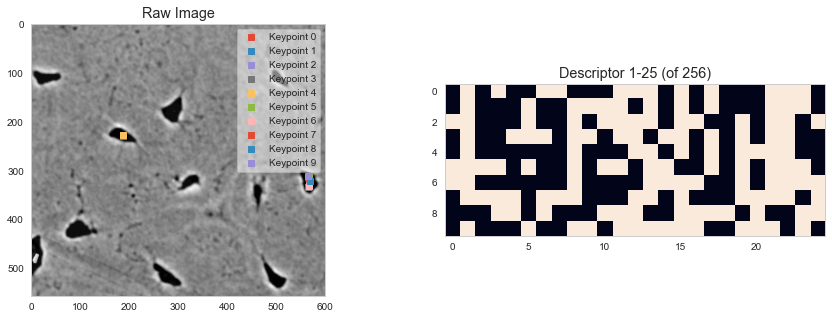

In [17]:
from skimage.feature import ORB
full_img = imread("figures/bonegfiltslice.png").mean(axis=2)
orb_det  = ORB(n_keypoints=10)
det_obj  = orb_det.detect_and_extract(full_img)

fig, (ax3, ax5) = plt.subplots(1, 2, figsize=(15, 5))
ax3.imshow(full_img, cmap='gray')
ax3.set_title('Raw Image')
for i in range(orb_det.keypoints.shape[0]):
    ax3.plot(orb_det.keypoints[i, 1], orb_det.keypoints[i,
                                                        0], 's', label='Keypoint {}'.format(i))
ax5.imshow(np.stack([x[:25] for x in orb_det.descriptors], 0))
ax5.set_title('Descriptor 1-25 (of 256)')
ax3.legend(facecolor='white', framealpha=0.5);

### Defining a supporting function to show the matches

This is a support function used to display the matched feature points between two images. 

In [18]:
from skimage.feature import match_descriptors, plot_matches
import matplotlib.pyplot as plt


def show_matches(img1, img2, feat1, feat2):
    matches12 = match_descriptors(feat1['descriptors'], 
                                  feat2['descriptors'], 
                                  cross_check=True)
    
    fig, (ax3, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    plot_matches(ax3,
                 img1, img2,
                 feat1['keypoints'], feat1['keypoints'],
                 matches12)

    ax2.plot(feat1['keypoints'][:, 1],
             feat1['keypoints'][:, 0],
             '.',
             label='Before')

    ax2.plot(feat2['keypoints'][:, 1],
             feat2['keypoints'][:, 0],
             '.', label='After')

    for i, (c_idx, n_idx) in enumerate(matches12):
        x_vec = [feat1['keypoints'][c_idx, 0], feat2['keypoints'][n_idx, 0]]
        y_vec = [feat1['keypoints'][c_idx, 1], feat2['keypoints'][n_idx, 1]]
        dist = np.sqrt(np.square(np.diff(x_vec))+np.square(np.diff(y_vec)))
        alpha = np.clip(50/dist, 0, 1)[0]

        ax2.plot(
            y_vec,
            x_vec,
            'k-',
            alpha=alpha,
            label='Match' if i == 0 else ''
        )

    ax2.legend()

    ax3.set_title(r'{} $\rightarrow$ {}'.format('Before', 'After'));

### Let's create some data

For this example we create a pair of images, where one translated and a smoothing median filter is applied. We will use this image pair to dest different descriptors in the next sections.

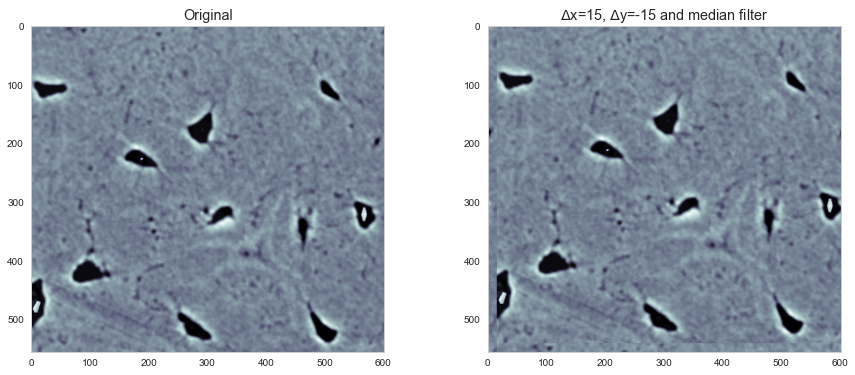

In [20]:
from skimage.filters import median
full_img = imread("figures/bonegfiltslice.png").mean(axis=2)
full_shift_img = median(
    np.roll(np.roll(full_img, -15, axis=0), 15, axis=1), np.ones((1, 3)))

bw_img    = full_img
shift_img = full_shift_img

fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].imshow(bw_img,cmap='bone')
ax[0].set_title('Original')
ax[1].imshow(shift_img,cmap='bone')
ax[1].set_title('$\Delta{}$x=15, $\Delta{}$y=-15 and median filter');


### Features found by the BRIEF descriptor

In this first example we use a combination of the Harris corner detector and BRIEF to create descriptors.

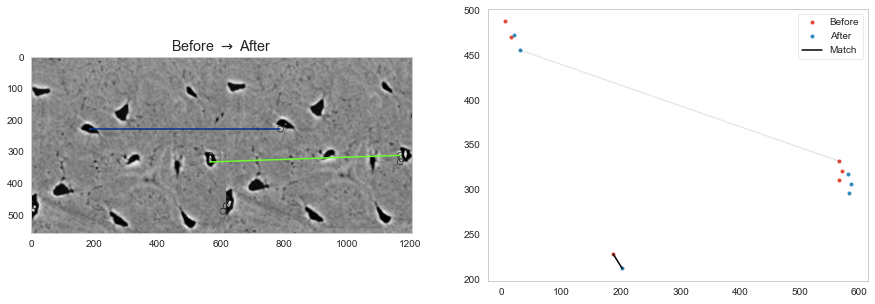

In [21]:
from skimage.feature import corner_peaks, corner_harris, BRIEF

def calc_corners(*imgs):
    b = BRIEF()
    for c_img in imgs:
        corner_img = corner_harris(c_img)
        coords = corner_peaks(corner_img, min_distance=5,threshold_rel=0.1)
        b.extract(c_img, coords)
        yield {'keypoints'  : coords,
               'descriptors': b.descriptors}


feat1, feat2 = calc_corners(bw_img, shift_img)
show_matches(bw_img, shift_img, feat1, feat2)

You see two matches in the right panel. One short and the other obviously far away which is less likely to be realistic.

### Features found by the ORB descriptor

The orb descriptor which has a more robust algorithm is able to find many more good pairs between the two time steps.

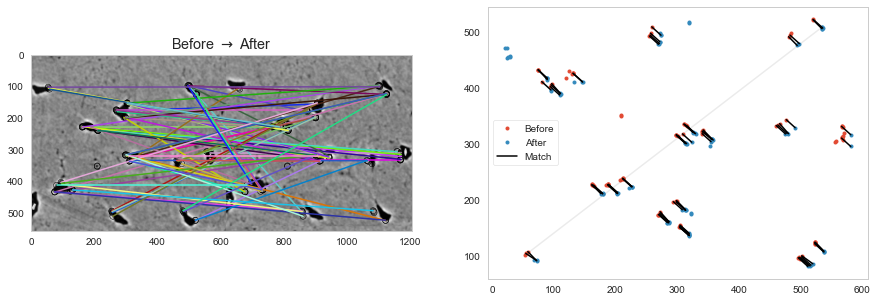

In [22]:
from skimage.feature import ORB, BRIEF, CENSURE


def calc_orb(*imgs):
    descriptor_extractor = ORB(n_keypoints=100)
    for c_img in imgs:
        descriptor_extractor.detect_and_extract(c_img)
        yield {'keypoints': descriptor_extractor.keypoints,
               'descriptors': descriptor_extractor.descriptors}


feat1, feat2 = calc_orb(bw_img, shift_img)
show_matches(bw_img, shift_img, feat1, feat2)

# Computing Average Flow
From each of these time steps we can now proceed to compute the average flow. 

We can perform this :
- spatially (averaging over regions), 
- temporally (averaging over time), 
- or spatial-temporally (averaging over regions for every time step)

In [23]:
average_field = []
for i in range(all_obj_df['frame_idx'].max()):
    frame_0 = all_obj_df[all_obj_df['frame_idx'].isin([i])]
    frame_1 = all_obj_df[all_obj_df['frame_idx'].isin([i+1])]
    dist_df_list = []
    for _, row_0 in frame_0.iterrows():
        for _, row_1 in frame_1.iterrows():
            dist_df_list += [dict(x0=row_0['x'],
                                  y0=row_0['y'],
                                  lab0=int(row_0['label']),
                                  x1=row_1['x'],
                                  y1=row_1['y'],
                                  lab1=int(row_1['label']),
                                  dist=np.sqrt(
                                      np.square(row_0['x']-row_1['x']) +
                                      np.square(row_0['y']-row_1['y'])))]
    dist_df = pd.DataFrame(dist_df_list)
    for _, c_rows in dist_df.groupby('lab0'):
        _, best_row = next(c_rows.sort_values('dist').iterrows())
        average_field += [dict(frame_idx=i,
                               x=best_row['x0'],
                               y=best_row['y0'],
                               dx=best_row['x1']-best_row['x0'],
                               dy=best_row['y1']-best_row['y0'])]
average_field_df = pd.DataFrame(average_field)
print('Average Flow:')
average_field_df[['dx', 'dy']].mean()

Average Flow:


dx   -1.0
dy   -1.0
dtype: float64

## Spatially Averaging
To spatially average we first create a grid of values and then interpolate our results onto this grid 
    <img src="figures/timeseries_avg_spatial.png">

```{figure} figures/timeseries_avg_spatial.png
---
---
Spatial averaging.
```

## Averaging fields

In [25]:
from scipy.interpolate import interp2d

def img_intp(f):
    def new_f(x, y):
        return np.stack([f(ix, iy) for ix, iy in zip(np.ravel(x), np.ravel(y))], 0).reshape(np.shape(x))
    return new_f


dx_func = img_intp(
    interp2d(average_field_df['x'], average_field_df['y'], average_field_df['dx']))
dy_func = img_intp(
    interp2d(average_field_df['x'], average_field_df['y'], average_field_df['dy']))
dx_func(8, 8), dy_func(8, 8)

(array(-1.), array(-1.))

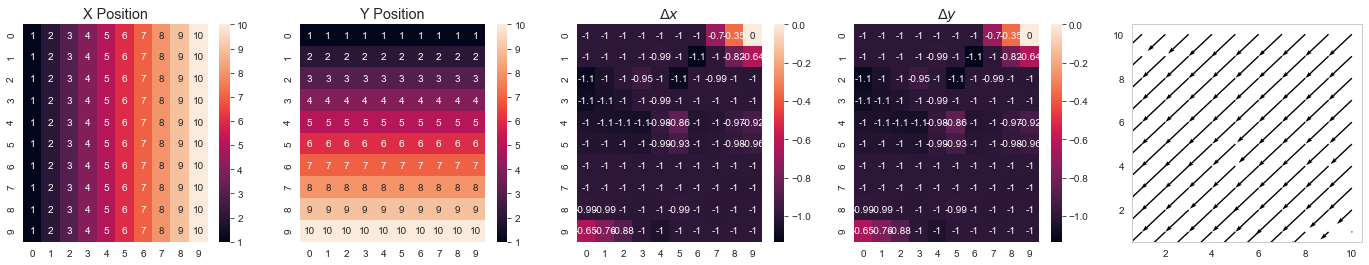

In [26]:
g_x, g_y = np.meshgrid(np.linspace(average_field_df['x'].min(),
                                   average_field_df['x'].max(), 10),
                       np.linspace(average_field_df['y'].min(),
                                   average_field_df['y'].max(), 10))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 4))
sns.heatmap(g_x, ax=ax1, annot=True)
ax1.set_title('X Position')
sns.heatmap(g_y, ax=ax2, annot=True)
ax2.set_title('Y Position')

sns.heatmap(dx_func(g_x, g_y), ax=ax3, annot=True)
ax3.set_title('$\Delta x$')
sns.heatmap(dy_func(g_x, g_y), ax=ax4, annot=True)
ax4.set_title('$\Delta y$')
ax5.quiver(g_x, g_y, dx_func(g_x, g_y), dy_func(g_x, g_y),
           scale=1.0, scale_units='xy', angles='xy');

## Temporarly Averaging
Here we take the average at each time point
    <img src="figures/timeseries_avg_temporal.png">

```{figure} figures/timeseries_avg_temporal.png
---
---
Temporarly averaging.
```

In [27]:
temp_avg_field = average_field_df[['frame_idx', 'dx', 'dy']].groupby(
    'frame_idx').agg('mean').reset_index()
temp_avg_field

,frame_idx,dx,dy
0,0,-1.0,-1.0
1,1,-1.0,-1.0
2,2,-1.0,-1.0
3,3,-1.0,-1.0


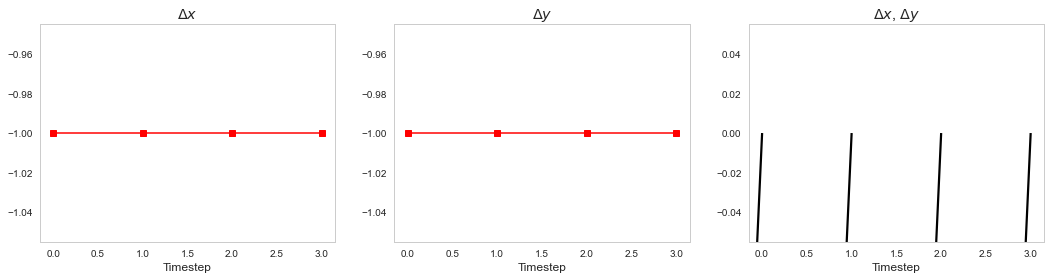

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
ax1.plot(temp_avg_field['frame_idx'], temp_avg_field['dx'], 'rs-')
ax1.set_title('$\Delta x$')
ax1.set_xlabel('Timestep')
ax2.plot(temp_avg_field['frame_idx'], temp_avg_field['dy'], 'rs-')
ax2.set_title('$\Delta y$')
ax2.set_xlabel('Timestep')
ax3.quiver(temp_avg_field['dx'], temp_avg_field['dy'],
           scale=1, scale_units='xy', angles='xy')
ax3.set_title('$\Delta x$, $\Delta y$')
ax3.set_xlabel('Timestep');

## Spatio-temporal Relationship
We can also divide the images into space and time steps
    <img src="figures/timeseries_avg_spatiotemporal.png">

```{figure} figures/timeseries_avg_spatiotemporal.png
---
---
Spatio-temporal averaging
```

In [30]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

g_x, g_y = np.meshgrid(np.linspace(average_field_df['x'].min(),
                                   average_field_df['x'].max(), 4),
                       np.linspace(average_field_df['y'].min(),
                                   average_field_df['y'].max(), 4))

frames = len(sorted(np.unique(average_field_df['frame_idx'])))
fig, m_axs = plt.subplots(2, 3, figsize=(12, 8))
for c_ax in m_axs.flatten():
    c_ax.axis('off')
[(ax1, ax2, _), (ax3, ax4, ax5)] = m_axs


def draw_frame_idx(idx):
    plt.cla()
    c_df = average_field_df[average_field_df['frame_idx'].isin([idx])]
    dx_func = img_intp(interp2d(c_df['x'], c_df['y'], c_df['dx']))
    dy_func = img_intp(interp2d(c_df['x'], c_df['y'], c_df['dy']))
    sns.heatmap(g_x, ax=ax1, annot=False, cbar=False)
    ax1.set_title('Frame %d\nX Position' % idx)
    sns.heatmap(g_y, ax=ax2, annot=False, cbar=False)
    ax2.set_title('Y Position')

    sns.heatmap(dx_func(g_x, g_y), ax=ax3, annot=False, cbar=False, fmt='2.1f')
    ax3.set_title('$\Delta x$')
    sns.heatmap(dy_func(g_x, g_y), ax=ax4, annot=False, cbar=False, fmt='2.1f')
    ax4.set_title('$\Delta y$')
    ax5.quiver(g_x, g_y, dx_func(g_x, g_y), dy_func(g_x, g_y),
               scale=1.0, scale_units='xy', angles='xy')


# write animation frames
anim_code = FuncAnimation(fig,
                          draw_frame_idx,
                          frames=frames,
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

/Users/kaestner/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=5,5 m=8 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


## Longer Series
We see that this approach becomes problematic when we want to work with longer series


In [ ]:

import pandas as pd
from skimage.morphology import label
from skimage.measure import regionprops
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)

s_img = disk_img.copy()
img_list = [s_img]
for i in range(8):
    if i % 2 == 0:
        s_img = np.roll(s_img, -2, axis=0)
    else:
        s_img = np.roll(s_img, -1, axis=1)
    img_list += [s_img]

all_objs = []
for frame_idx, c_img in enumerate(img_list):
    lab_img = label(c_img > 0)
    for c_obj in regionprops(lab_img):
        all_objs += [dict(label=int(c_obj.label),
                          y=c_obj.centroid[0],
                          x=c_obj.centroid[1],
                          area=c_obj.area,
                          frame_idx=frame_idx)]
all_obj_df = pd.DataFrame(all_objs)
all_obj_df.head(5)


def update_frame(i):
    plt.cla()
    sns.heatmap(img_list[i],
                annot=True,
                fmt="d",
                cmap='nipy_spectral',
                ax=c_ax,
                cbar=False,
                vmin=0,
                vmax=1)
    c_ax.set_title('Iteration #{}'.format(i+1))


# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=len(img_list),
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

### The resulting tracking

Tracking this longer series soon get complicated with the amount of direction changes in the scene.

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, c_ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
c_ax.matshow(disk_img > 1,cmap='gist_yarg')


def draw_timestep(i):
    # plt.cla()
    frame_0 = all_obj_df[all_obj_df['frame_idx'].isin([i])]
    frame_1 = all_obj_df[all_obj_df['frame_idx'].isin([i+1])]
    c_ax.scatter(frame_0['x'], frame_0['y'], c='black', label='Frame: %d' % i)
    c_ax.scatter(frame_1['x'], frame_1['y'],
                 c='red', label='Frame: %d' % (i+1))
    dist_df_list = []
    for _, row_0 in frame_0.iterrows():
        for _, row_1 in frame_1.iterrows():
            dist_df_list += [dict(x0=row_0['x'],
                                  y0=row_0['y'],
                                  lab0=int(row_0['label']),
                                  x1=row_1['x'],
                                  y1=row_1['y'],
                                  lab1=int(row_1['label']),
                                  dist=np.sqrt(
                                      np.square(row_0['x']-row_1['x']) +
                                      np.square(row_0['y']-row_1['y'])))]
    dist_df = pd.DataFrame(dist_df_list)
    for _, c_rows in dist_df.groupby('lab0'):
        _, best_row = next(c_rows.sort_values('dist').iterrows())
        c_ax.quiver(best_row['x0'], best_row['y0'],
                    best_row['x1']-best_row['x0'],
                    best_row['y1']-best_row['y0'],
                    scale=1.0, scale_units='xy', angles='xy', alpha=0.25)
    c_ax.set_title('Frame #{}'.format(i+1))


# write animation frames
anim_code = FuncAnimation(fig,
                          draw_timestep,
                          frames=all_obj_df['frame_idx'].max(),
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

In [ ]:
from scipy.interpolate import interp2d
average_field = []
for i in range(all_obj_df['frame_idx'].max()):
    frame_0 = all_obj_df[all_obj_df['frame_idx'].isin([i])]
    frame_1 = all_obj_df[all_obj_df['frame_idx'].isin([i+1])]
    dist_df_list = []
    for _, row_0 in frame_0.iterrows():
        for _, row_1 in frame_1.iterrows():
            dist_df_list += [dict(x0=row_0['x'],
                                  y0=row_0['y'],
                                  lab0=int(row_0['label']),
                                  x1=row_1['x'],
                                  y1=row_1['y'],
                                  lab1=int(row_1['label']),
                                  dist=np.sqrt(
                                      np.square(row_0['x']-row_1['x']) +
                                      np.square(row_0['y']-row_1['y'])))]
    dist_df = pd.DataFrame(dist_df_list)
    for _, c_rows in dist_df.groupby('lab0'):
        _, best_row = next(c_rows.sort_values('dist').iterrows())
        average_field += [dict(frame_idx=i,
                               x=best_row['x0'],
                               y=best_row['y0'],
                               dx=best_row['x1']-best_row['x0'],
                               dy=best_row['y1']-best_row['y0'])]
average_field_df = pd.DataFrame(average_field)
print('Average Flow:')
print(average_field_df[['dx', 'dy']].mean())


def img_intp(f):
    def new_f(x, y):
        return np.stack([f(ix, iy) for ix, iy in zip(np.ravel(x), np.ravel(y))], 0).reshape(np.shape(x))
    return new_f


dx_func = img_intp(
    interp2d(average_field_df['x'], average_field_df['y'], average_field_df['dx']))
dy_func = img_intp(
    interp2d(average_field_df['x'], average_field_df['y'], average_field_df['dy']))

g_x, g_y = np.meshgrid(np.linspace(average_field_df['x'].min(),
                                   average_field_df['x'].max(), 5),
                       np.linspace(average_field_df['y'].min(),
                                   average_field_df['y'].max(), 5))
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(24, 4))
sns.heatmap(g_x, ax=ax1, annot=True)
ax1.set_title('X Position')
sns.heatmap(g_y, ax=ax2, annot=True)
ax2.set_title('Y Position')

sns.heatmap(dx_func(g_x, g_y), ax=ax3, annot=True)
ax3.set_title('$\Delta x$')
sns.heatmap(dy_func(g_x, g_y), ax=ax4, annot=True)
ax4.set_title('$\Delta y$')
ax5.quiver(g_x, g_y, dx_func(g_x, g_y), dy_func(g_x, g_y),
           scale=1.0, scale_units='xy', angles='xy');

,frame_idx,dx,dy
0,0,-1.0,-1.0
1,1,-1.0,-1.0
2,2,-1.0,-1.0
3,3,-1.0,-1.0


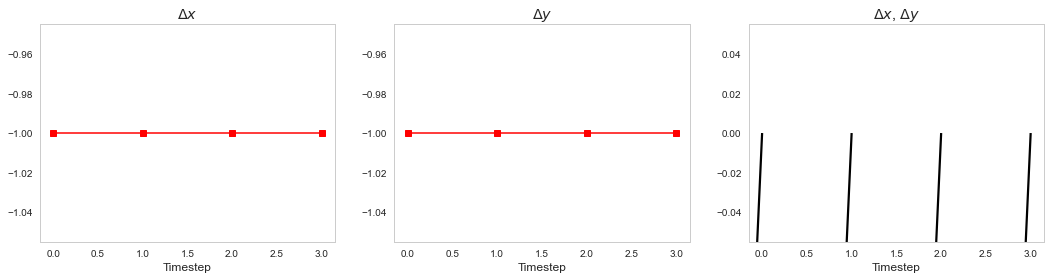

In [31]:
temp_avg_field = average_field_df[['frame_idx', 'dx', 'dy']].groupby(
    'frame_idx').agg('mean').reset_index()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
ax1.plot(temp_avg_field['frame_idx'], temp_avg_field['dx'], 'rs-')
ax1.set_title('$\Delta x$')
ax1.set_xlabel('Timestep')
ax2.plot(temp_avg_field['frame_idx'], temp_avg_field['dy'], 'rs-')
ax2.set_title('$\Delta y$')
ax2.set_xlabel('Timestep')
ax3.quiver(temp_avg_field['dx'], temp_avg_field['dy'],
           scale=1, scale_units='xy', angles='xy')
ax3.set_title('$\Delta x$, $\Delta y$')
ax3.set_xlabel('Timestep')
temp_avg_field

In [33]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

g_x, g_y = np.meshgrid(np.linspace(average_field_df['x'].min(),
                                   average_field_df['x'].max(), 4),
                       np.linspace(average_field_df['y'].min(),
                                   average_field_df['y'].max(), 4))

frames = len(sorted(np.unique(average_field_df['frame_idx'])))
fig, m_axs = plt.subplots(2, 3, figsize=(14, 10))
for c_ax in m_axs.flatten():
    c_ax.axis('off')
[(ax1, ax2, _), (ax3, ax4, ax5)] = m_axs


def draw_frame_idx(idx):
    plt.cla()
    c_df = average_field_df[average_field_df['frame_idx'].isin([idx])]
    dx_func = img_intp(interp2d(c_df['x'], c_df['y'], c_df['dx']))
    dy_func = img_intp(interp2d(c_df['x'], c_df['y'], c_df['dy']))
    sns.heatmap(g_x, ax=ax1, annot=False, cbar=False)
    ax1.set_title('Frame %d\nX Position' % idx)
    sns.heatmap(g_y, ax=ax2, annot=False, cbar=False)
    ax2.set_title('Y Position')

    sns.heatmap(dx_func(g_x, g_y), ax=ax3, annot=False, cbar=False, fmt='2.1f')
    ax3.set_title('$\Delta x$')
    sns.heatmap(dy_func(g_x, g_y), ax=ax4, annot=False, cbar=False, fmt='2.1f')
    ax4.set_title('$\Delta y$')
    ax5.quiver(g_x, g_y, dx_func(g_x, g_y), dy_func(g_x, g_y),
               scale=1.0, scale_units='xy', angles='xy')


# write animation frames
anim_code = FuncAnimation(fig,
                          draw_frame_idx,
                          frames=frames,
                          interval=1000,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

/Users/kaestner/opt/anaconda3/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=5,5 m=8 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


# Problems with tracking
## Random Appearance / Disappearance


Under perfect imaging and experimental conditions objects should not appear and reappear but due to 
- Noise
- Limited fields of view / depth of field
- Discrete segmentation approachs
- Motion artifacts
    - Blurred objects often have lower intensity values than still objects

It is common for objects to appear and vanish regularly in an experiment.

## Jitter / Motion Noise

Even perfect spherical objects do not move in a straight line: 

- The jitter can be seen as a stochastic variable with a random magnitude ($a$) and angle ($b$). 
- This is then sampled at every point in the field

$$ \vec{v}(\vec{x})=\vec{v}_L(\vec{x})+||a||\measuredangle b $$


## Limitations of Tracking

We see that visually tracking samples can be difficult and there are a number of parameters which affect the ability for us to clearly see the tracking.
- flow rate
- flow type
- density
- appearance and disappearance rate 
- jitter
- particle uniqueness

# How to improve tracking
We have to try to quantify the limits of these parameters for different tracking methods in order to design experiments better. 

### Acquisition-based Parameters

- Acquisition rate 
    - flow rate vs. sampling rate 
    - jitter (per frame)
- Resolution  
    - density, 
    - appearance rate


### Experimental Parameters

- Experimental setup (pressure, etc) $\rightarrow$ flow rate/type 
- Polydispersity $\rightarrow$ particle uniqueness
- Vibration/temperature $\rightarrow$ jitter
- Mixture $\rightarrow$ density contrast

## Basic Simulations


Input flow from simulation

$$ \vec{v}(\vec{x})=\langle 0,0,0.05 \rangle+||0.01||\measuredangle b $$


<table>
<tr>
    <th>Measured flow</th><th>Tracked flow</th>
</tr>
<tr>
<td>
<img src="figures/basic_flow.png" style="width:300px" />
</td>
<td><img src="figures/basic_flow_tracked.png" style="width:300px" /></td></tr>
</table>



## Designing Experiments


### How does this help us to design experiments?
- density can be changed by adjusting the concentration of the substances being examined or the field of view
- flow per frame (image velocity) can usually be adjusted by changing pressure or acquisition time
- jitter can be estimated from images

### How much is enough?
__Difficult to create one number for every experiment__

- 5% error in bubble position $\rightarrow$
    - <5% in flow field
    - \>20% error in topology
    
<br/>    
    
- 5% error in shape or volume $\rightarrow$ 
    - 5% in distribution or changes  
    - \> 5% in individual bubble changes
    - \> 15% for single bubble strain tensor calculations

## Extending Nearest Neighbor


### Bijective Requirement

We define $\vec{P}_f$ as the result of performing the nearest neigbhor tracking on $\vec{P}_0$
$$ \vec{P}_f=\textrm{argmin}(||\vec{P}_0-\vec{y} || \forall \vec{y}\in I_1) $$

We define $\vec{P}_i$ as the result of performing the nearest neigbhor tracking on $\vec{P}_f$
$$ \vec{P}_i=\textrm{argmin}(||\vec{P}_f-\vec{y} || \forall \vec{y}\in I_0) $$

We say the tracking is bijective if these two points are the same
$$ \vec{P}_i \stackrel{?}{=} \vec{P}_0 $$



### Maximum Displacement

$$ \vec{P}_1=\begin{cases} 
||\vec{P}_0-\vec{y} ||<\textrm{MAXD}, & \textrm{argmin}(||\vec{P}_0-\vec{y} || \forall \vec{y}\in I_1) \\
\textrm{Otherwise}, & \emptyset \end{cases}$$

## Extending Nearest Neighbor (Continued)

Models of movement behavior to support tracking

### Prior / Expected Movement

$$\vec{P}_1=\textrm{argmin}(||\vec{P}_0+\vec{v}_{offset}-\vec{y} || \forall \vec{y}\in I_1)$$

### Adaptive Movement
Can then be calculated in an iterative fashion where the offset is the average from all of the $\vec{P}_1-\vec{P}_0$ vectors. It can also be performed 

$$ \vec{P}_1=\textrm{argmin}(||\vec{P}_0+\vec{v}_{offset}-\vec{y} || \forall \vec{y}\in I_1) $$

### More advanced models
- Use expected physical model
- Use track derivative to find $v_{offset}$
- Kalman filters can be used for particle tracking

## Beyond Nearest Neighbor

While nearest neighbor 
- provides a useful starting tool 
- it is not sufficient for truly complicated flows and datasets.

### Better Approaches

#### Multiple Hypothesis Testing
- Nearest neighbor just compares the points between two frames and there is much more information available in most time-resolved datasets. 

- This approach allows for multiple possible paths to be explored at the same time and the best chosen only after all frames have been examined


### Shortcomings

#### Merging and Splitting Particles
- The simplicity of the nearest neighbor model does really allow for particles to merge and split (relaxing the bijective requirement allows such behavior, but the method is still not suited for such tracking). 
- For such systems a more specific, physically-based is required to encapsulate this behavior.

## Voxel-based Approaches

For voxel-based approachs the most common analyses are digital image correlation (or for 3D images digital volume correlation), where the correlation is calculated between two images or volumes.

### Standard Image Correlation

Given images $I_0(\vec{x})$ and $I_1(\vec{x})$ at time $t_0$ and $t_1$ respectively. The correlation between these two images can be calculated for each $\vec{r}$

$$ C_{I_0,I_1}(\vec{r})=\langle I_0(\vec{x}) I_1(\vec{x}+\vec{r}) \rangle $$

This can also be done in the Fourier space

$$C_{I_0,I_1}(\vec{r})=\mathcal{F}^{-1}\{\mathcal{F}\{I_0\}\cdot \mathcal{F}\{I_1\}^{*}\}$$

### Let's make some test data
We use a 'five' from the MNIST data set of handwritten numbers

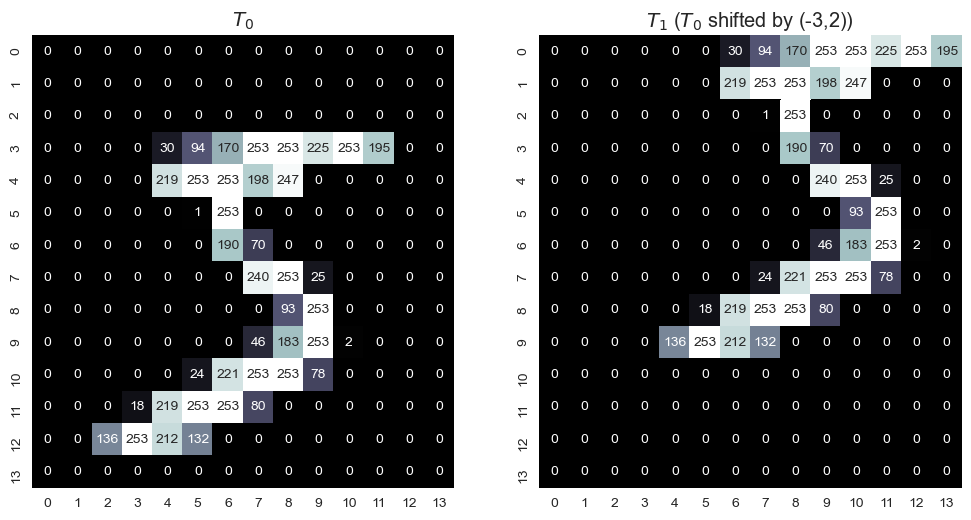

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
bw_img = np.load('data/five.npy') # A 'five' from the mnist data set

shift_img = np.roll(np.roll(bw_img, -3, axis=0), 2, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
sns.heatmap(bw_img, ax=ax1, cbar=False, annot=True, fmt='d', cmap='bone'), ax1.set_title('$T_0$')
sns.heatmap(shift_img, ax=ax2, cbar=False, annot=True, fmt='d', cmap='bone') , ax2.set_title('$T_1$ ($T_0$ shifted by (-3,2))');

### Demonstration of the correlation in space

In [25]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

mx, my = np.meshgrid(np.arange(-4, 6, 2),
                     np.arange(-4, 6, 2))

nx = mx.ravel()
ny = my.ravel()
out_score = np.zeros(nx.shape, dtype=np.float32)


def update_frame(i):
    a_img = bw_img
    b_img = np.roll(np.roll(shift_img, nx[i], axis=1), ny[i], axis=0)
    ax1.cla()
    sns.heatmap(a_img, ax=ax1, cbar=False, annot=True, fmt='0.0f', cmap='bone')
    ax2.cla()
    sns.heatmap(b_img, ax=ax2, cbar=False, annot=True, fmt='0.0f', cmap='bone')

    out_score[i] = np.mean(a_img*b_img)
    ax3.cla()
    sns.heatmap(out_score.reshape(mx.shape), ax=ax3,
                cbar=False, annot=True, fmt='2.1f', cmap='viridis')
    ax3.set_xticklabels(mx[0, :])
    ax3.set_yticklabels(my[:, 0])
    ax1.set_title('Iteration #{}'.format(i+1))
    ax2.set_title('X-Offset: {0}\nY-Offset: {1}'.format(nx[i], ny[i]))
    ax3.set_title(r'$\langle I_0(\vec{x}) I_1(\vec{x}+\vec{r}) \rangle$')


# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=len(nx),
                          interval=300,
                          repeat_delay=4000).to_html5_video()
plt.close('all')
HTML(anim_code)

## Other metrics

### Mean Squared Error
We can also use 
- MSE 
- or RMSE 

and look for minima

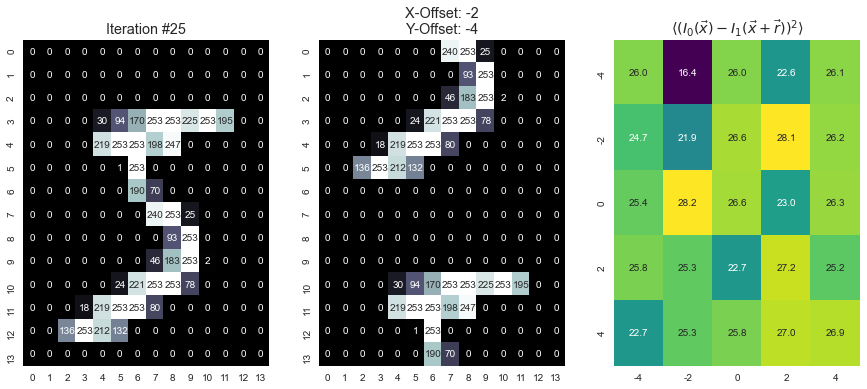

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
out_score     = np.zeros(nx.shape, dtype=np.float32)

for i in range(len(nx)):
    a_img = bw_img
    b_img = np.roll(np.roll(shift_img, nx[i], axis=1), ny[i], axis=0)
    out_score[i] = np.mean(np.square(a_img-b_img))


# get the minimum
i_min = np.argmin(out_score)
b_img = np.roll(np.roll(shift_img, nx[i_min], axis=1), ny[i_min], axis=0)

sns.heatmap(a_img, ax=ax1, cbar=False, annot=True, fmt='d', cmap='bone')
sns.heatmap(b_img, ax=ax2, cbar=False, annot=True, fmt='d', cmap='bone')
sns.heatmap(out_score.reshape(mx.shape), ax=ax3, cbar=False,
            annot=True, fmt='2.1f', cmap='viridis')

ax3.set_xticklabels(mx[0, :])
ax3.set_yticklabels(my[:, 0])
ax1.set_title('Iteration #{}'.format(i+1))
ax2.set_title('X-Offset: %d\nY-Offset: %d' % (nx[i_min], ny[i_min]))
ax3.set_title(r'$\langle (I_0(\vec{x})-I_1(\vec{x}+\vec{r}))^2 \rangle$');

## Correlation using the Fourier transform
$$C_{I_0,I_1}(\vec{r})=\mathcal{F}^{-1}\{\mathcal{F}\{I_0\}\cdot \mathcal{F}\{I_1\}^{*}\}$$

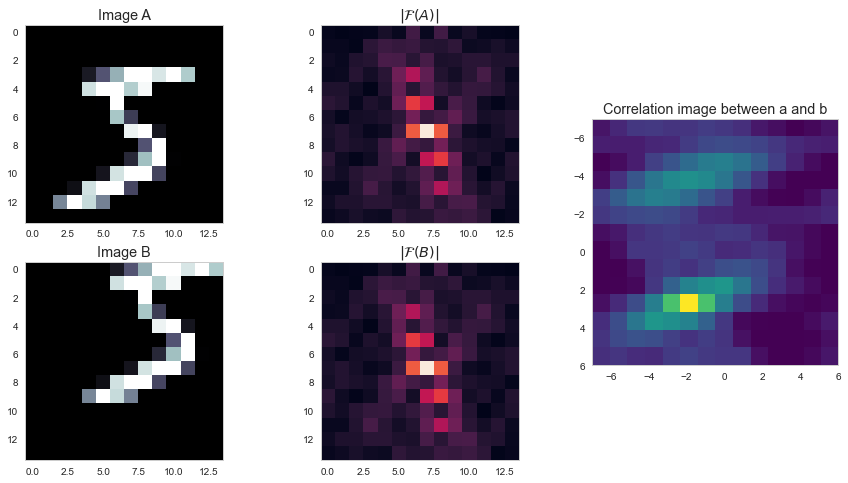

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1); plt.imshow(bw_img,cmap='bone'); plt.title('Image A')
plt.subplot(2,3,4); plt.imshow(shift_img,cmap='bone'); plt.title('Image B')

fa=(np.fft.fft2(bw_img));
fb=(np.fft.fft2(shift_img));

plt.subplot(2,3,2); plt.imshow(np.abs(np.fft.fftshift(fa))); plt.title('$|\mathcal{F}(A)|$')
plt.subplot(2,3,5); plt.imshow(np.abs(np.fft.fftshift(fb))); plt.title('$|\mathcal{F}(B)|$')

f=fa*np.conjugate(fb);
co=np.abs(np.fft.fftshift(np.fft.ifft2(f)));
plt.subplot(1,3,3)
plt.imshow(np.abs(co), extent = [-7 , 6, 6 , -7], cmap='viridis');plt.title('Correlation image between a and b');

## Real Example 
### Bone Slice Registration

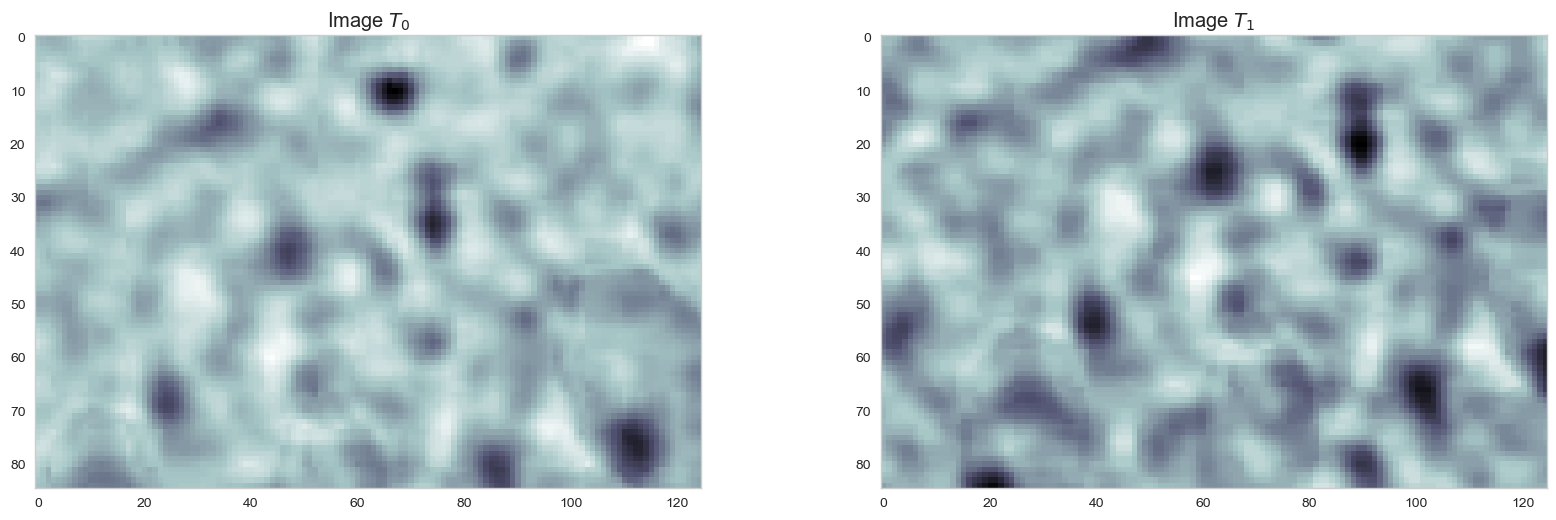

In [43]:
import numpy as np
from skimage.filters import median
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
full_img = imread("figures/bonegfiltslice.png").mean(axis=2)
full_shift_img = median(
    np.roll(np.roll(full_img, -15, axis=0), 15, axis=1), np.ones((1, 3)))

def g_roi(x): return x[5:90, 150:275]

bw_img = g_roi(full_img)

shift_img = g_roi(full_shift_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=100)
ax1.imshow(bw_img, cmap='bone'),ax1.set_title('Image $T_0$')
ax2.imshow(shift_img, cmap='bone'),ax2.set_title('Image $T_1$');

## Let's look at a smaller region

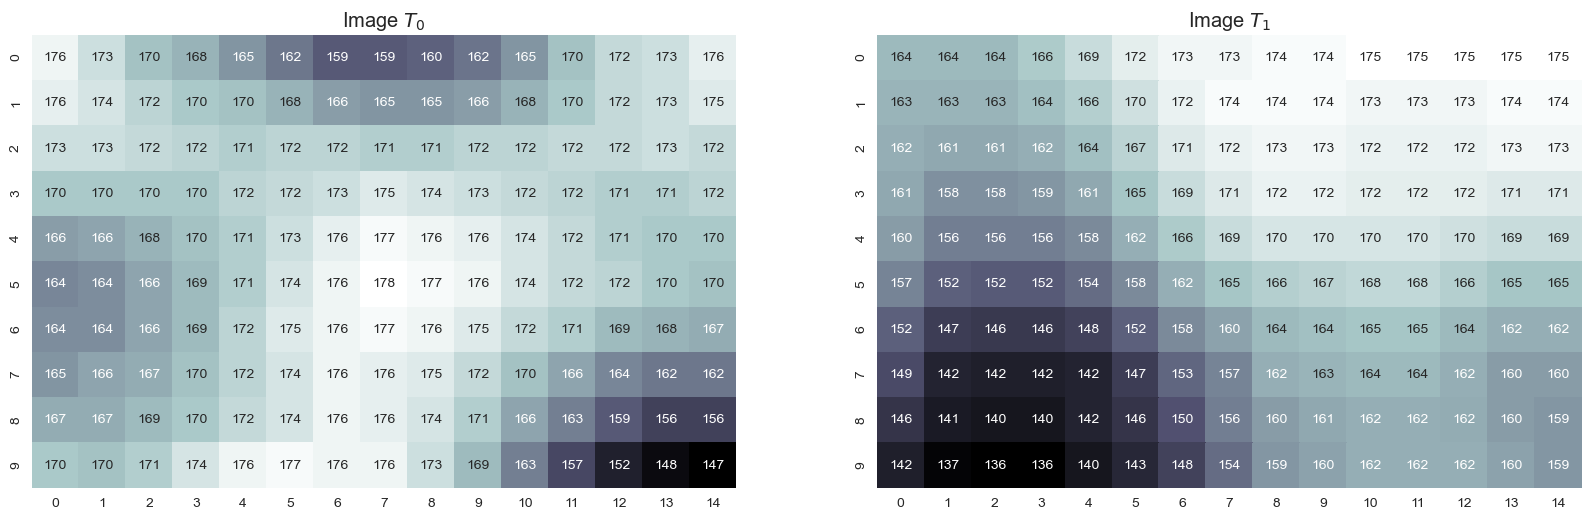

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=100)

def g_roi(x): return x[20:30, 210:225]

sns.heatmap(g_roi(full_img), ax=ax1, cbar=False,
            annot=True, fmt='0.0f', cmap='bone'), ax1.set_title('Image $T_0$')
sns.heatmap(g_roi(full_shift_img), ax=ax2, cbar=False,
            annot=True, fmt='0.0f', cmap='bone'); ax2.set_title('Image $T_1$');

In [27]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

def g_roi(x): return x[20:30:2, 210:225:2]

mx, my = np.meshgrid(np.arange(-10, 12, 4),
                     np.arange(-10, 12, 4))

nx = mx.ravel()
ny = my.ravel()
out_score = np.zeros(nx.shape, dtype=np.float32)

def update_frame(i):
    a_img = g_roi(full_img)
    b_img = g_roi(np.roll(np.roll(full_shift_img, nx[i], axis=1), ny[i], axis=0))
    ax1.cla(), sns.heatmap(a_img, ax=ax1, cbar=False, annot=True, fmt='0.0f', cmap='bone')
    ax2.cla(), sns.heatmap(b_img, ax=ax2, cbar=False, annot=True, fmt='0.0f', cmap='bone')
    out_score[i] = np.mean(np.square(a_img-b_img))
    ax3.cla(), sns.heatmap(out_score.reshape(mx.shape), ax=ax3, cbar=False, annot=True, fmt='2.1f', cmap='RdBu')
    ax1.set_title('Iteration #{}'.format(i+1))
    ax2.set_title('X-Offset: %d\nY-Offset: %d' % (2*nx[i], 2*ny[i]))
    ax3.set_xticklabels(mx[0, :])
    ax3.set_yticklabels(my[:, 0])

# write animation frames
anim_code = FuncAnimation(fig,
                          update_frame,
                          frames=len(nx),
                          interval=300,
                          repeat_delay=2000).to_html5_video()
plt.close('all')
HTML(anim_code)

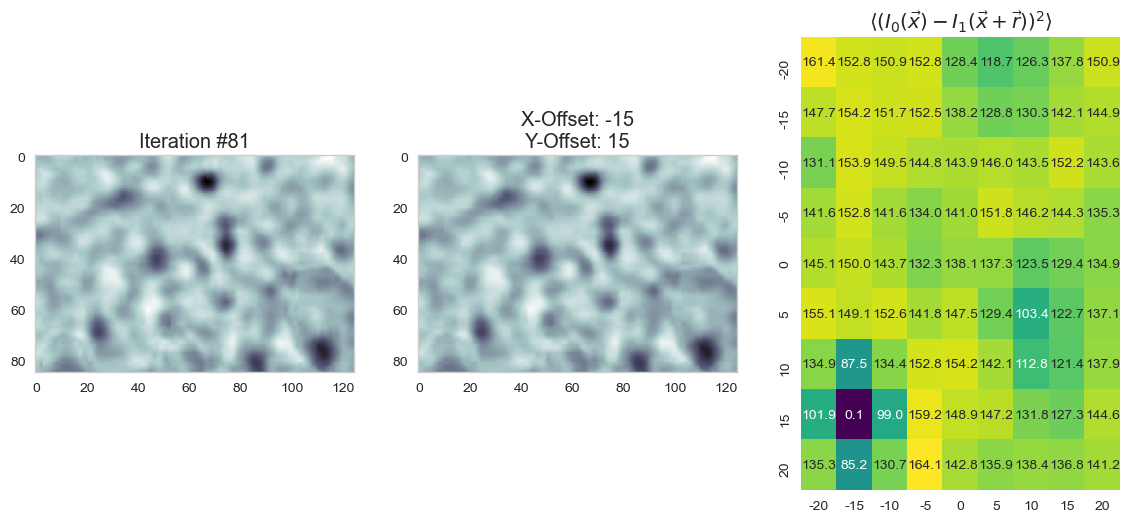

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6), dpi=100)


mx, my = np.meshgrid(np.arange(-20, 25, 5),
                     np.arange(-20, 25, 5))

nx = mx.ravel()
ny = my.ravel()
out_score = np.zeros(nx.shape, dtype=np.float32)

out_score = np.zeros(nx.shape, dtype=np.float32)


def g_roi(x): return x[5:90, 150:275]


for i in range(len(nx)):
    a_img = g_roi(full_img)
    b_img = g_roi(
        np.roll(np.roll(full_shift_img, nx[i], axis=1), ny[i], axis=0))
    out_score[i] = np.mean(np.square(a_img-b_img))

# get the minimum
i_min = np.argmin(out_score)
b_img = g_roi(np.roll(np.roll(full_shift_img, nx[i_min], axis=1), ny[i_min], axis=0))
ax1.imshow(a_img, cmap='bone'), ax1.set_title('$T_0$')
ax2.imshow(b_img, cmap='bone'), ax2.set_title('$T_1$ Registered')
sns.heatmap(out_score.reshape(mx.shape), ax=ax3, cbar=False,annot=True, fmt='2.1f', cmap='viridis')
ax3.set_xticklabels(mx[0, :]), ax3.set_yticklabels(my[:, 0])
ax1.set_title('Iteration #{}'.format(i+1))
ax2.set_title('X-Offset: %d\nY-Offset: %d' % (nx[i_min], ny[i_min]))
ax3.set_title(r'$\langle (I_0(\vec{x})-I_1(\vec{x}+\vec{r}))^2 \rangle$');

# Registration

Before any meaningful tracking tasks can be performed, the first step is to register the measurements so they are all on the same coordinate system. 

Often the registration can be done along with the tracking by separating the movement into actual sample movement and other (camera, setup, etc) if the motion of either the sample or the other components can be well modeled.

In medicine this is frequently needed because different scanners produce different kinds of outputs with different scales, positioning and resolutions. This is also useful for 'follow-up' scans with patients to identify how a disease has progressed. With scans like chest X-rays it isn't uncommon to have multiple (some patients have hundreds) all taken under different conditions

<img src="figures/cxr_nih.gif" />

```{figure} figures/cxr_nih.png
---
---
A series of chest X-ray images taken at different times.
```

## The Process
We informally followed a process before when trying to match the two images together, but we want to make this more generic for a larger spectrum of problems. 

We thus follow the model set forward by tools like [ITK](https://itk.org/ITKSoftwareGuide/html/Book2/ITKSoftwareGuide-Book2ch3.html) with the components divided into the input data:
- *Moving Image* 
- and *Fixed Image* sometimes called *Reference Image*).

### The algorithmic components
- The *Transform* operation to transform the moving image. 
- The *interpolator* to handle bringing all of the points onto a pixel grid. 
- The *Metric* which is the measure of how well the transformed moving image and fixed image match 
- and finally the *Optimizer* that tries to find the best solution

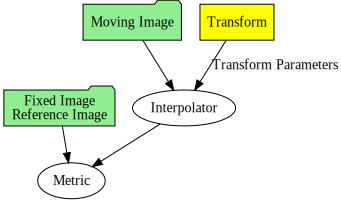

In [49]:
from IPython.display import SVG
from subprocess import check_output
import pydot
import os


def show_graph(graph):
    try:
        return SVG(graph.create_svg())
    except AttributeError as e:
        output = check_output('dot -Tsvg', shell=True,
                              input=g.to_string().encode())
        return SVG(output.decode())


g = pydot.Graph(graph_type='digraph')
fixed_img = pydot.Node('Fixed Image\nReference Image',
                       shape='folder', style="filled", fillcolor="lightgreen")
moving_img = pydot.Node('Moving Image', shape='folder',
                        style="filled", fillcolor="lightgreen")
trans_obj = pydot.Node('Transform', shape='box',
                       style='filled', fillcolor='yellow')
g.add_node(fixed_img)
g.add_node(moving_img)
g.add_node(trans_obj)
g.add_edge(pydot.Edge(fixed_img, 'Metric'))
g.add_edge(pydot.Edge(moving_img, 'Interpolator'))
g.add_edge(pydot.Edge(trans_obj, 'Interpolator', label='Transform Parameters'))
g.add_edge(pydot.Edge('Interpolator', 'Metric'))
show_graph(g)

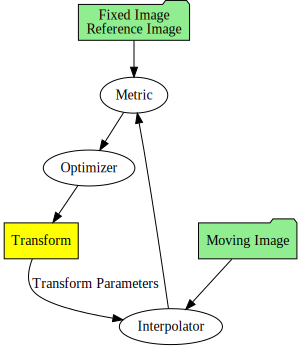

In [50]:
g.add_edge(pydot.Edge('Metric', 'Optimizer'))
g.add_edge(pydot.Edge('Optimizer', trans_obj))
show_graph(g)

## Images
### Fixed Image
The fixed image (or reference image) is the image that will be left untouched and used for comparison
### Moving Image
The moving image will be transformed (translated, scaled, rotated, deformed, ...) to try and match as closely as possible the fixed image.

## Transform
The transform specifies the transformations which can take place on the moving image, a number of different types are possible, but the most frequent types are listed below.
- Affine
- Translation
- Scaling
- Deformable
- Shearing

## Interpolator
The interpolator is the component applies the transform to the moving image. The common ways of interpolating are
- Nearest Neighbor
- Bilinear
- Bicubic
- Bspline
- ... 

## Metric

The metric is how the success of the matching of the two images is measured. The goal is to measure similarity between images.
- Mean Squared Error - the simplist metric to use just recording the raw difference, but often this can lead to unusual matches since noise and uneven illumination can lead to high MSE for images that match well.
- SSIM similarity metric
- Correlation Factor

## Optimizer

The optimizer component is responsible for updating the parameters based on the metric. A standard approach with this is gradient descent where the gradient is calculated and a small step (determined by the learning rate) is taken in the direction of maximum descent.
- Gradient Descent
- Adam 
- Stochastic Gradient Descent
- AdaGrad
- AdaDelta

## Our tracker

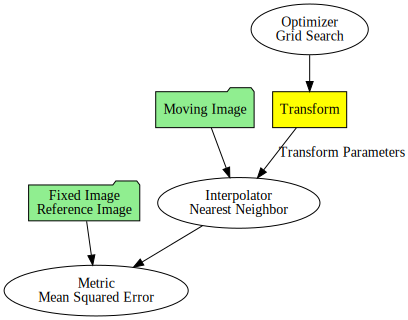

In [51]:
from IPython.display import Image,SVG

g = pydot.Dot(graph_type='digraph')
fixed_img = pydot.Node('Fixed Image\nReference Image',
                       shape='folder', style="filled", fillcolor="lightgreen")
moving_img = pydot.Node('Moving Image', shape='folder',
                        style="filled", fillcolor="lightgreen")
trans_obj = pydot.Node('Transform', shape='box',
                       style='filled', fillcolor='yellow')
g.add_node(fixed_img)
g.add_node(moving_img)
g.add_node(trans_obj)
g.add_edge(pydot.Edge(fixed_img, 'Metric\nMean Squared Error'))
g.add_edge(pydot.Edge(moving_img, 'Interpolator\nNearest Neighbor'))
g.add_edge(pydot.Edge(trans_obj, 'Interpolator\nNearest Neighbor',
                      label='Transform Parameters'))
g.add_edge(pydot.Edge('Interpolator\nNearest Neighbor',
                      'Metric\nMean Squared Error'))
#g.add_edge(pydot.Edge('Metric\nMean Squared Error', 'Optimizer\nGrid Search', style = ''))
g.add_edge(pydot.Edge('Optimizer\nGrid Search', trans_obj))
show_graph(g)

## Registration of the bone image

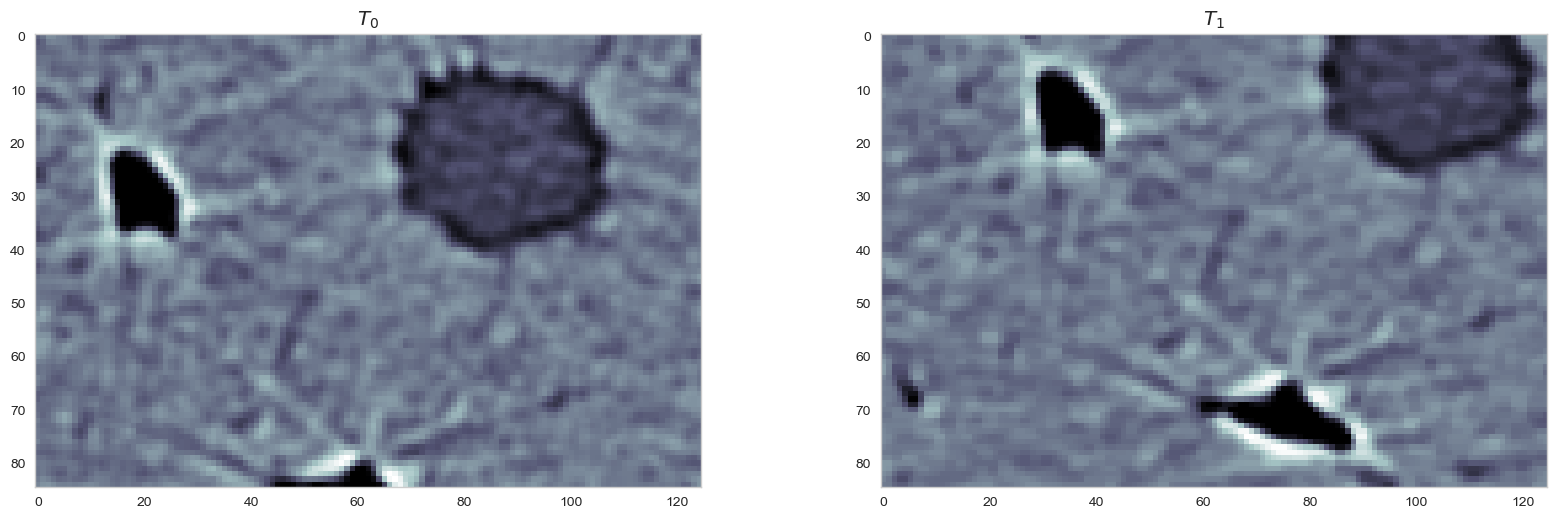

In [38]:
import numpy as np
from skimage.filters import median
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline
full_img = imread("ext-figures/bonegfiltslice.png")
full_shift_img = median(
    np.roll(np.roll(full_img, -15, axis=0), 15, axis=1), np.ones((1, 3)))


def g_roi(x): return x[5:90, 150:275]


bw_img = g_roi(full_img)
shift_img = g_roi(full_shift_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=100)
ax1.imshow(bw_img, cmap='bone')
ax1.set_title('$T_0$')
ax2.imshow(shift_img, cmap='bone')
ax2.set_title('$T_1$');

In [ ]:
%%file affine_op.py
import tensorflow as tf

"""
Code taken from https://github.com/kevinzakka/spatial-transformer-network/blob/master/transformer.py
"""


def affine_transform(input_fmap, theta, out_dims=None, **kwargs):
    """
    Spatial Transformer Network layer implementation as described in [1].
    The layer is composed of 3 elements:
    - localisation_net: takes the original image as input and outputs 
      the parameters of the affine transformation that should be applied
      to the input image.
    - affine_grid_generator: generates a grid of (x,y) coordinates that 
      correspond to a set of points where the input should be sampled 
      to produce the transformed output.
    - bilinear_sampler: takes as input the original image and the grid
      and produces the output image using bilinear interpolation.
    Input
    -----
    - input_fmap: output of the previous layer. Can be input if spatial
      transformer layer is at the beginning of architecture. Should be 
      a tensor of shape (B, H, W, C). 
    - theta: affine transform tensor of shape (B, 6). Permits cropping, 
      translation and isotropic scaling. Initialize to identity matrix. 
      It is the output of the localization network.
    Returns
    -------
    - out_fmap: transformed input feature map. Tensor of size (B, H, W, C).
    Notes
    -----
    [1]: 'Spatial Transformer Networks', Jaderberg et. al,
         (https://arxiv.org/abs/1506.02025)
    """
    # grab input dimensions
    B = tf.shape(input_fmap)[0]
    H = tf.shape(input_fmap)[1]
    W = tf.shape(input_fmap)[2]
    C = tf.shape(input_fmap)[3]

    # reshape theta to (B, 2, 3)
    theta = tf.reshape(theta, [B, 2, 3])

    # generate grids of same size or upsample/downsample if specified
    if out_dims:
        out_H = out_dims[0]
        out_W = out_dims[1]
        batch_grids = affine_grid_generator(out_H, out_W, theta)
    else:
        batch_grids = affine_grid_generator(H, W, theta)

    x_s = batch_grids[:, 0, :, :]
    y_s = batch_grids[:, 1, :, :]

    # sample input with grid to get output
    out_fmap = bilinear_sampler(input_fmap, x_s, y_s)

    return out_fmap


def get_pixel_value(img, x, y):
    """
    Utility function to get pixel value for coordinate
    vectors x and y from a  4D tensor image.
    Input
    -----
    - img: tensor of shape (B, H, W, C)
    - x: flattened tensor of shape (B*H*W, )
    - y: flattened tensor of shape (B*H*W, )
    Returns
    -------
    - output: tensor of shape (B, H, W, C)
    """
    shape = tf.shape(x)
    batch_size = shape[0]
    height = shape[1]
    width = shape[2]

    batch_idx = tf.range(0, batch_size)
    batch_idx = tf.reshape(batch_idx, (batch_size, 1, 1))
    b = tf.tile(batch_idx, (1, height, width))

    indices = tf.stack([b, y, x], 3)

    return tf.gather_nd(img, indices)


def affine_grid_generator(height, width, theta):
    """
    This function returns a sampling grid, which when
    used with the bilinear sampler on the input feature 
    map, will create an output feature map that is an 
    affine transformation [1] of the input feature map.
    Input
    -----
    - height: desired height of grid/output. Used
      to downsample or upsample. 
    - width: desired width of grid/output. Used
      to downsample or upsample. 
    - theta: affine transform matrices of shape (num_batch, 2, 3). 
      For each image in the batch, we have 6 theta parameters of 
      the form (2x3) that define the affine transformation T.
    Returns
    -------
    - normalized gird (-1, 1) of shape (num_batch, 2, H, W).
      The 2nd dimension has 2 components: (x, y) which are the 
      sampling points of the original image for each point in the
      target image.
    Note
    ----
    [1]: the affine transformation allows cropping, translation, 
         and isotropic scaling.
    """
    # grab batch size
    num_batch = tf.shape(theta)[0]

    # create normalized 2D grid
    x = tf.linspace(-1.0, 1.0, width)
    y = tf.linspace(-1.0, 1.0, height)
    x_t, y_t = tf.meshgrid(x, y)

    # flatten
    x_t_flat = tf.reshape(x_t, [-1])
    y_t_flat = tf.reshape(y_t, [-1])

    # reshape to [x_t, y_t , 1] - (homogeneous form)
    ones = tf.ones_like(x_t_flat)
    sampling_grid = tf.stack([x_t_flat, y_t_flat, ones])

    # repeat grid num_batch times
    sampling_grid = tf.expand_dims(sampling_grid, axis=0)
    sampling_grid = tf.tile(sampling_grid, tf.stack([num_batch, 1, 1]))

    # cast to float32 (required for matmul)
    theta = tf.cast(theta, 'float32')
    sampling_grid = tf.cast(sampling_grid, 'float32')

    # transform the sampling grid - batch multiply
    batch_grids = tf.matmul(theta, sampling_grid)
    # batch grid has shape (num_batch, 2, H*W)

    # reshape to (num_batch, H, W, 2)
    batch_grids = tf.reshape(batch_grids, [num_batch, 2, height, width])

    return batch_grids


def bilinear_sampler(img, x, y):
    """
    Performs bilinear sampling of the input images according to the 
    normalized coordinates provided by the sampling grid. Note that 
    the sampling is done identically for each channel of the input.
    To test if the function works properly, output image should be
    identical to input image when theta is initialized to identity
    transform.
    Input
    -----
    - img: batch of images in (B, H, W, C) layout.
    - grid: x, y which is the output of affine_grid_generator.
    Returns
    -------
    - interpolated images according to grids. Same size as grid.
    """
    # prepare useful params
    B = tf.shape(img)[0]
    H = tf.shape(img)[1]
    W = tf.shape(img)[2]
    C = tf.shape(img)[3]

    max_y = tf.cast(H - 1, 'int32')
    max_x = tf.cast(W - 1, 'int32')
    zero = tf.zeros([], dtype='int32')

    # cast indices as float32 (for rescaling)
    x = tf.cast(x, 'float32')
    y = tf.cast(y, 'float32')

    # rescale x and y to [0, W/H]
    x = 0.5 * ((x + 1.0) * tf.cast(W, 'float32'))
    y = 0.5 * ((y + 1.0) * tf.cast(H, 'float32'))

    # grab 4 nearest corner points for each (x_i, y_i)
    # i.e. we need a rectangle around the point of interest
    x0 = tf.cast(tf.floor(x), 'int32')
    x1 = x0 + 1
    y0 = tf.cast(tf.floor(y), 'int32')
    y1 = y0 + 1

    # clip to range [0, H/W] to not violate img boundaries
    x0 = tf.clip_by_value(x0, zero, max_x)
    x1 = tf.clip_by_value(x1, zero, max_x)
    y0 = tf.clip_by_value(y0, zero, max_y)
    y1 = tf.clip_by_value(y1, zero, max_y)

    # get pixel value at corner coords
    Ia = get_pixel_value(img, x0, y0)
    Ib = get_pixel_value(img, x0, y1)
    Ic = get_pixel_value(img, x1, y0)
    Id = get_pixel_value(img, x1, y1)

    # recast as float for delta calculation
    x0 = tf.cast(x0, 'float32')
    x1 = tf.cast(x1, 'float32')
    y0 = tf.cast(y0, 'float32')
    y1 = tf.cast(y1, 'float32')

    # calculate deltas
    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    # add dimension for addition
    wa = tf.expand_dims(wa, axis=3)
    wb = tf.expand_dims(wb, axis=3)
    wc = tf.expand_dims(wc, axis=3)
    wd = tf.expand_dims(wd, axis=3)

    # compute output
    out = tf.add_n([wa*Ia, wb*Ib, wc*Ic, wd*Id])

    return out

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from affine_op import affine_transform
g = tf.Graph()

with g.as_default():
    init = tf.global_variables_initializer()
    # tf Graph Input
    fixed_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='FixedImage')
    moving_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='MovingImage')
    # Initialize the variables (i.e. assign their default value)

    with tf.name_scope('transform_parameters'):  # Set transform parameters
        x_offset = tf.Variable(0.0, name="x_offset")
        y_offset = tf.Variable(0.0, name="y_offset")
        # we keep scale and rotation fixed
        scale = tf.placeholder("float", shape=tuple(), name="scale")
        rotation = tf.placeholder("float", shape=tuple(), name="rotation")

    with tf.name_scope('transformer_and_interpolator'):
        flat_mat = tf.tile([tf.cos(rotation), -tf.sin(rotation), x_offset,
                            tf.sin(rotation), tf.cos(rotation), y_offset], (1,))
        flat_mat = tf.reshape(flat_mat, (1, 6))
        trans_tensor = affine_transform(moving_img, flat_mat)

    with tf.name_scope('metric'): 
        mse = tf.reduce_mean(
            tf.square(fixed_img-trans_tensor), name='MeanSquareError')
        optimizer = tf.train.GradientDescentOptimizer(1e-5).minimize(mse)

In [ ]:
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add()
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>" % size
    return strip_def


def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


show_graph(g)

In [ ]:
# Start training
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np


def make_feed_dict(f_img, m_img):
    return {fixed_img: np.expand_dims(np.expand_dims(f_img, 0), -1),
            moving_img: np.expand_dims(np.expand_dims(m_img, 0), -1),
            rotation: 0.0}


loss_history = []
optimize_iters = 10
with tf.Session(graph=g) as sess:
    plt.close('all')
    fig, m_axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
    #tf.initialize_all_variables().run()
    init = tf.global_variables_initializer()
    # Run the initializer
    sess.run(init)
    # Fit all training data
    const_feed_dict = make_feed_dict(bw_img, shift_img)

    def update_frame(i):
        global loss_history
        (ax1, ax2), (ax4, ax3) = m_axs
        for c_ax in m_axs.flatten():
            c_ax.cla()
            c_ax.axis('off')
        f_mse, x_pos, y_pos, rs_img = sess.run([mse, x_offset, y_offset, trans_tensor],
                                               feed_dict=const_feed_dict)
        loss_history += [f_mse]

        ax1.imshow(bw_img, cmap='bone')
        ax1.set_title('$T_0$')
        ax2.imshow(shift_img, cmap='bone')
        ax2.set_title('$T_1$')
        #ax3.imshow(rs_img[0,:,:,0], cmap = 'bone')
        # ax3.set_title('Output')
        ax4.imshow(bw_img*1.0-rs_img[0, :, :, 0],
                   cmap='RdBu', vmin=-100, vmax=100)
        ax4.set_title('Difference\nMSE: %2.2f' % (f_mse))
        ax3.semilogy(loss_history)
        ax3.set_xlabel('Iteration')
        ax3.set_ylabel('MSE (Log-scale)')
        ax3.axis('on')

        for _ in range(1):
            sess.run(optimizer, feed_dict=const_feed_dict)
    # write animation frames
    anim_code = FuncAnimation(fig,
                              update_frame,
                              frames=optimize_iters,
                              interval=1000,
                              repeat_delay=2000).to_html5_video()
    plt.close('all')
HTML(anim_code)

In [54]:
g_roi = tf.Graph()
with g_roi.as_default():
    init = tf.global_variables_initializer()
    # tf Graph Input
    fixed_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='FixedImage')
    moving_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='MovingImage')
    # Initialize the variables (i.e. assign their default value)

    with tf.name_scope('transform_parameters'):  # Set transform parameters
        x_offset = tf.Variable(0.0, name="x_offset")
        y_offset = tf.Variable(0.0, name="y_offset")
        # we keep rotation fixed
        rotation = tf.placeholder("float", shape=tuple(), name="rotation")

    with tf.name_scope('transformer_and_interpolator'):
        flat_mat = tf.tile([tf.cos(rotation), -tf.sin(rotation), x_offset,
                            tf.sin(rotation), tf.cos(rotation), y_offset], (1,))
        flat_mat = tf.reshape(flat_mat, (1, 6))
        trans_tensor = affine_transform(moving_img, flat_mat)

    with tf.name_scope('metric'):
        diff_tensor = (fixed_img-trans_tensor)[:, 25:75, 25:110, :]
        mse = tf.reduce_mean(tf.square(diff_tensor), name='MeanSquareError')
        optimizer = tf.train.GradientDescentOptimizer(2e-6).minimize(mse)

In [ ]:
# Start training
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import patches
optimize_iters = 20
loss_history = []
with tf.Session(graph=g_roi) as sess:
    plt.close('all')
    fig, m_axs = plt.subplots(2, 3, figsize=(9, 4), dpi=100)
    init = tf.global_variables_initializer()
    # Run the initializer
    sess.run(init)
    # Fit all training data
    const_feed_dict = make_feed_dict(bw_img, shift_img)

    def update_frame(i):
        global loss_history
        (ax1, ax2, ax5), (ax3, ax4, ax6) = m_axs
        for c_ax in m_axs.flatten():
            c_ax.cla()
            c_ax.axis('off')
        f_mse, x_pos, y_pos, rs_img, diff_img = sess.run([mse, x_offset, y_offset, trans_tensor, diff_tensor],
                                                         feed_dict=const_feed_dict)
        loss_history += [f_mse]

        ax1.imshow(bw_img, cmap='bone')
        ax1.set_title('$T_0$')
        ax2.imshow(shift_img, cmap='bone')
        ax2.set_title('$T_1$')
        ax3.imshow(rs_img[0, :, :, 0], cmap='bone')
        ax3.set_title('Output')
        ax4.imshow(bw_img*1.0-rs_img[0, :, :, 0],
                   cmap='RdBu', vmin=-100, vmax=100)
        ax4.set_title('MSE: %2.2f' % (f_mse))
        rect = patches.Rectangle(
            (25, 25), 85, 50, linewidth=2, edgecolor='g', facecolor='none')
        # Add the patch to the Axes
        ax4.add_patch(rect)
        ax5.semilogy(loss_history)
        ax5.set_xlabel('Iteration')
        ax5.set_ylabel('MSE (Log-scale)')
        ax5.axis('on')

        ax6.imshow(diff_img[0, :, :, 0], cmap='RdBu', vmin=-100, vmax=100)
        ax6.set_title('ROI')
        for _ in range(5):
            sess.run(optimizer, feed_dict=const_feed_dict)
    # write animation frames
    anim_code = FuncAnimation(fig,
                              update_frame,
                              frames=optimize_iters,
                              interval=1000,
                              repeat_delay=2000).to_html5_video()
    plt.close('all')
HTML(anim_code)

## Smoother Gradient
We can use a distance map of the segmentation to give us a smoother gradient

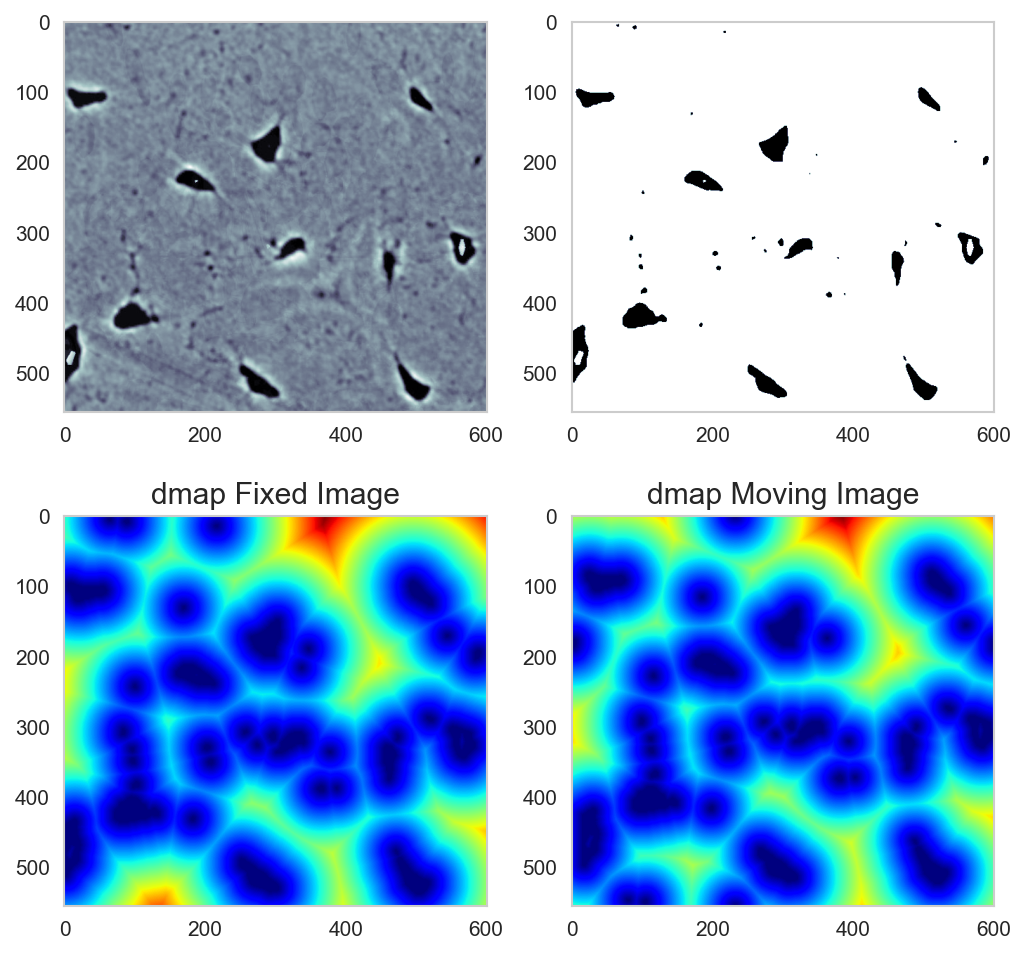

In [86]:
from scipy.ndimage import distance_transform_edt
from skimage.filters import threshold_otsu
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(8, 8))
thresh_img = bw_img > threshold_otsu(bw_img)
dist_start_img = distance_transform_edt(thresh_img)
dist_shift_img = distance_transform_edt(shift_img > threshold_otsu(bw_img))

ax1.imshow(bw_img, cmap='bone')
ax2.imshow(thresh_img, cmap='bone')
ax3.imshow(dist_start_img, cmap='jet')
ax3.set_title('dmap Fixed Image')
ax4.imshow(dist_shift_img, cmap='jet')
ax4.set_title('dmap Moving Image');

In [ ]:
# Start training
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import patches
optimize_iters = 20
loss_history = []
with tf.Session(graph=g_roi) as sess:
    plt.close('all')
    fig, m_axs = plt.subplots(2, 3, figsize=(12, 4), dpi=100)
    # Run the initializer
 #   tf.initialize_all_variables().run()
    tf.global_variables_initializer()
    # Fit all training data
    const_feed_dict = make_feed_dict(dist_start_img, dist_shift_img)
    real_image_feed_dict = make_feed_dict(bw_img, shift_img)

    def update_frame(i):
        global loss_history
        (ax1, ax2, ax5), (ax3, ax4, ax6) = m_axs
        for c_ax in m_axs.flatten():
            c_ax.cla()
            c_ax.axis('off')
        f_mse, x_pos, y_pos, rs_img, diff_img = sess.run([mse, x_offset, y_offset, trans_tensor, diff_tensor],
                                                         feed_dict=const_feed_dict)
        real_rs_img, real_diff_img = sess.run([trans_tensor, diff_tensor],
                                              feed_dict=real_image_feed_dict)

        loss_history += [f_mse]

        ax1.imshow(bw_img, cmap='bone')
        ax1.set_title('$T_0$')
        ax2.imshow(shift_img, cmap='bone')
        ax2.set_title('$T_1$')
        ax3.imshow(real_rs_img[0, :, :, 0], cmap='bone')
        ax3.set_title('Output')
        ax4.imshow(dist_start_img*1.0 -
                   rs_img[0, :, :, 0], cmap='RdBu', vmin=-10, vmax=10)
        ax4.set_title('MSE: %2.2f' % (f_mse))
        rect = patches.Rectangle(
            (25, 25), 75, 50, linewidth=2, edgecolor='g', facecolor='none')
        # Add the patch to the Axes
        ax4.add_patch(rect)
        ax5.semilogy(loss_history)
        ax5.set_xlabel('Iteration')
        ax5.set_ylabel('MSE\n(Log-scale)')
        ax5.axis('on')

        ax6.imshow(diff_img[0, :, :, 0], cmap='RdBu', vmin=-10, vmax=10)
        ax6.set_title('ROI')
        for _ in range(200):
            sess.run(optimizer, feed_dict=const_feed_dict)
    # write animation frames
    anim_code = FuncAnimation(fig,
                              update_frame,
                              frames=optimize_iters,
                              interval=1000,
                              repeat_delay=2000).to_html5_video()
    plt.close('all')
HTML(anim_code)

In [46]:
%%file backport_ssim.py
from tensorflow.python.ops import array_ops, control_flow_ops, check_ops, math_ops, nn_ops, nn
from tensorflow.python.framework import constant_op, dtypes, ops

# backporting new tensorflow ops is soo much fun
_SSIM_K1 = 0.01
_SSIM_K2 = 0.03


def _ssim_helper(x, y, reducer, max_val, compensation=1.0):
    r"""Helper function for computing SSIM.
    SSIM estimates covariances with weighted sums.  The default parameters
    use a biased estimate of the covariance:
    Suppose `reducer` is a weighted sum, then the mean estimators are
      \mu_x = \sum_i w_i x_i,
      \mu_y = \sum_i w_i y_i,
    where w_i's are the weighted-sum weights, and covariance estimator is
      cov_{xy} = \sum_i w_i (x_i - \mu_x) (y_i - \mu_y)
    with assumption \sum_i w_i = 1. This covariance estimator is biased, since
      E[cov_{xy}] = (1 - \sum_i w_i ^ 2) Cov(X, Y).
    For SSIM measure with unbiased covariance estimators, pass as `compensation`
    argument (1 - \sum_i w_i ^ 2).
    Arguments:
      x: First set of images.
      y: Second set of images.
      reducer: Function that computes 'local' averages from set of images.
        For non-covolutional version, this is usually tf.reduce_mean(x, [1, 2]),
        and for convolutional version, this is usually tf.nn.avg_pool or
        tf.nn.conv2d with weighted-sum kernel.
      max_val: The dynamic range (i.e., the difference between the maximum
        possible allowed value and the minimum allowed value).
      compensation: Compensation factor. See above.
    Returns:
      A pair containing the luminance measure, and the contrast-structure measure.
    """
    c1 = (_SSIM_K1 * max_val) ** 2
    c2 = (_SSIM_K2 * max_val) ** 2

    # SSIM luminance measure is
    # (2 * mu_x * mu_y + c1) / (mu_x ** 2 + mu_y ** 2 + c1).
    mean0 = reducer(x)
    mean1 = reducer(y)
    num0 = mean0 * mean1 * 2.0
    den0 = math_ops.square(mean0) + math_ops.square(mean1)
    luminance = (num0 + c1) / (den0 + c1)

    # SSIM contrast-structure measure is
    #   (2 * cov_{xy} + c2) / (cov_{xx} + cov_{yy} + c2).
    # Note that `reducer` is a weighted sum with weight w_k, \sum_i w_i = 1, then
    #   cov_{xy} = \sum_i w_i (x_i - \mu_x) (y_i - \mu_y)
    #          = \sum_i w_i x_i y_i - (\sum_i w_i x_i) (\sum_j w_j y_j).
    num1 = reducer(x * y) * 2.0
    den1 = reducer(math_ops.square(x) + math_ops.square(y))
    c2 *= compensation
    cs = (num1 - num0 + c2) / (den1 - den0 + c2)

    # SSIM score is the product of the luminance and contrast-structure measures.
    return luminance, cs


def _fspecial_gauss(size, sigma):
    """Function to mimic the 'fspecial' gaussian MATLAB function."""
    size = ops.convert_to_tensor(size, dtypes.int32)
    sigma = ops.convert_to_tensor(sigma)

    coords = math_ops.cast(math_ops.range(size), sigma.dtype)
    coords -= math_ops.cast(size - 1, sigma.dtype) / 2.0

    g = math_ops.square(coords)
    g *= -0.5 / math_ops.square(sigma)

    g = array_ops.reshape(g, shape=[1, -1]) + \
        array_ops.reshape(g, shape=[-1, 1])
    g = array_ops.reshape(g, shape=[1, -1])  # For tf.nn.softmax().
    g = nn_ops.softmax(g)
    return array_ops.reshape(g, shape=[size, size, 1, 1])


def _ssim_per_channel(img1, img2, max_val=1.0):
    """Computes SSIM index between img1 and img2 per color channel.
    This function matches the standard SSIM implementation from:
    Wang, Z., Bovik, A. C., Sheikh, H. R., & Simoncelli, E. P. (2004). Image
    quality assessment: from error visibility to structural similarity. IEEE
    transactions on image processing.
    Details:
      - 11x11 Gaussian filter of width 1.5 is used.
      - k1 = 0.01, k2 = 0.03 as in the original paper.
    Args:
      img1: First image batch.
      img2: Second image batch.
      max_val: The dynamic range of the images (i.e., the difference between the
        maximum the and minimum allowed values).
    Returns:
      A pair of tensors containing and channel-wise SSIM and contrast-structure
      values. The shape is [..., channels].
    """
    filter_size = constant_op.constant(11, dtype=dtypes.int32)
    filter_sigma = constant_op.constant(1.5, dtype=img1.dtype)

    shape1, shape2 = array_ops.shape_n([img1, img2])
    checks = [
        control_flow_ops.Assert(math_ops.reduce_all(math_ops.greater_equal(
            shape1[-3:-1], filter_size)), [shape1, filter_size], summarize=8),
        control_flow_ops.Assert(math_ops.reduce_all(math_ops.greater_equal(
            shape2[-3:-1], filter_size)), [shape2, filter_size], summarize=8)]

    # Enforce the check to run before computation.
    with ops.control_dependencies(checks):
        img1 = array_ops.identity(img1)

    # TODO(sjhwang): Try to cache kernels and compensation factor.
    kernel = _fspecial_gauss(filter_size, filter_sigma)
    kernel = array_ops.tile(kernel, multiples=[1, 1, shape1[-1], 1])

    # The correct compensation factor is `1.0 - tf.reduce_sum(tf.square(kernel))`,
    # but to match MATLAB implementation of MS-SSIM, we use 1.0 instead.
    compensation = 1.0

    # TODO(sjhwang): Try FFT.
    # TODO(sjhwang): Gaussian kernel is separable in space. Consider applying
    #   1-by-n and n-by-1 Gaussain filters instead of an n-by-n filter.
    def reducer(x):
        shape = array_ops.shape(x)
        x = array_ops.reshape(x, shape=array_ops.concat([[-1], shape[-3:]], 0))
        y = nn.depthwise_conv2d(
            x, kernel, strides=[1, 1, 1, 1], padding='VALID')
        return array_ops.reshape(y, array_ops.concat([shape[:-3],
                                                      array_ops.shape(y)[1:]], 0))

    luminance, cs = _ssim_helper(img1, img2, reducer, max_val, compensation)

    # Average over the second and the third from the last: height, width.
    axes = constant_op.constant([-3, -2], dtype=dtypes.int32)
    ssim_val = math_ops.reduce_mean(luminance * cs, axes)
    cs = math_ops.reduce_mean(cs, axes)
    return ssim_val, cs

Overwriting backport_ssim.py


### Try structural similarity index metric

In [ ]:
from backport_ssim import _ssim_per_channel
g_roi_ssim = tf.Graph()
with g_roi_ssim.as_default():
    init = tf.global_variables_initializer()
    # tf Graph Input
    fixed_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='FixedImage')
    moving_img = tf.placeholder("float", shape=(
        1, None, None, 1), name='MovingImage')
    # Initialize the variables (i.e. assign their default value)

    with tf.name_scope('transform_parameters'):  # Set transform parameters
        x_offset = tf.Variable(0.0, name="x_offset")
        y_offset = tf.Variable(0.0, name="y_offset")
        # we keep rotation fixed
        rotation = tf.placeholder("float", shape=tuple(), name="rotation")

    with tf.name_scope('transformer_and_interpolator'):
        flat_mat = tf.tile([tf.cos(rotation), -tf.sin(rotation), x_offset,
                            tf.sin(rotation), tf.cos(rotation), y_offset], (1,))
        flat_mat = tf.reshape(flat_mat, (1, 6))
        trans_tensor = affine_transform(moving_img, flat_mat)

    with tf.name_scope('metric'):
        ssim, _ = _ssim_per_channel(fixed_img[:, 20:75, 25:100, :]/255.0,
                                    trans_tensor[:, 20:75, 25:100, :]/255.0,
                                    max_val=1.0)
        mssim = tf.reduce_mean(ssim, name='MeanSSIM')
        rev_mssim = 1-mssim  # since we can only minimize
        optimizer = tf.train.GradientDescentOptimizer(5e-2).minimize(rev_mssim)

In [ ]:
# Start training
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import patches
optimize_iters = 40
loss_history = []
with tf.Session(graph=g_roi_ssim) as sess:
    plt.close('all')
    fig, m_axs = plt.subplots(2, 3, figsize=(11, 5), dpi=100)
    tf.initialize_all_variables().run()
    # Run the initializer
    sess.run(init)
    # Fit all training data
    const_feed_dict = make_feed_dict(bw_img, shift_img)

    def update_frame(i):
        global loss_history
        (ax1, ax2, ax5), (ax3, ax4, ax6) = m_axs
        for c_ax in m_axs.flatten():
            c_ax.cla()
            c_ax.axis('off')
        f_ssim, x_pos, y_pos, rs_img = sess.run([mssim, x_offset, y_offset, trans_tensor],
                                                feed_dict=const_feed_dict)
        loss_history += [f_ssim]

        ax1.imshow(bw_img, cmap='bone')
        ax1.set_title('$T_0$')
        ax2.imshow(shift_img, cmap='bone')
        ax2.set_title('$T_1$')
        ax3.imshow(rs_img[0, :, :, 0], cmap='bone')
        ax3.set_title('Output')
        ax4.imshow(bw_img*1.0-rs_img[0, :, :, 0],
                   cmap='RdBu', vmin=-100, vmax=100)
        ax4.set_title('Difference\nSSIM: %2.2f' % (f_ssim))
        rect = patches.Rectangle(
            (25, 20), 75, 55, linewidth=2, edgecolor='g', facecolor='none')
        # Add the patch to the Axes
        ax4.add_patch(rect)
        ax5.plot(loss_history)
        ax5.set_xlabel('Iteration')
        ax5.set_ylabel('SSIM')
        ax5.axis('on')

        for _ in range(1):
            sess.run(optimizer, feed_dict=const_feed_dict)
    # write animation frames
    anim_code = FuncAnimation(fig,
                              update_frame,
                              frames=optimize_iters,
                              interval=1000,
                              repeat_delay=2000).to_html5_video()
    plt.close('all')
HTML(anim_code)

## Registration using ITK and Simple ITK
For medical imaging the standard tools used are ITK and SimpleITK and they have been optimized over decades to deliver high-performance registration tasks. They are a bit clumsy to use from python, but they offer by far the best established tools for these problems.

[https://itk.org/ITKSoftwareGuide/html/Book2/ITKSoftwareGuide-Book2ch3.html]

In [47]:
import SimpleITK as sitk

def register_img(fixed_arr,
                 moving_arr,
                 use_affine=True,
                 use_mse=True,
                 brute_force=True):
    fixed_image = sitk.GetImageFromArray(fixed_arr)
    moving_image = sitk.GetImageFromArray(moving_arr)
    transform = sitk.AffineTransform(
        2) if use_affine else sitk.ScaleTransform(2)
    initial_transform = sitk.CenteredTransformInitializer(sitk.Cast(fixed_image, moving_image.GetPixelID()),
                                                          moving_image,
                                                          transform,
                                                          sitk.CenteredTransformInitializerFilter.GEOMETRY)
    ff_img = sitk.Cast(fixed_image, sitk.sitkFloat32)
    mv_img = sitk.Cast(moving_image, sitk.sitkFloat32)
    registration_method = sitk.ImageRegistrationMethod()
    if use_mse:
        registration_method.SetMetricAsMeanSquares()
    else:
        registration_method.SetMetricAsMattesMutualInformation(
            numberOfHistogramBins=50)

    if brute_force:
        sample_per_axis = 12
        registration_method.SetOptimizerAsExhaustive(
            [sample_per_axis//2, 0, 0])
        # Utilize the scale to set the step size for each dimension
        registration_method.SetOptimizerScales(
            [2.0*3.14/sample_per_axis, 1.0, 1.0])
    else:
        registration_method.SetMetricSamplingStrategy(
            registration_method.RANDOM)
        registration_method.SetMetricSamplingPercentage(0.25)

    registration_method.SetInterpolator(sitk.sitkLinear)

    registration_method.SetOptimizerAsGradientDescent(learningRate=1.0,
                                                      numberOfIterations=200,
                                                      convergenceMinimumValue=1e-6,
                                                      convergenceWindowSize=10)
    # Scale the step size differently for each parameter, this is critical!!!
    registration_method.SetOptimizerScalesFromPhysicalShift()

    registration_method.SetInitialTransform(initial_transform, inPlace=False)
    final_transform_v1 = registration_method.Execute(ff_img,
                                                     mv_img)
    print('Optimizer\'s stopping condition, {0}'.format(
        registration_method.GetOptimizerStopConditionDescription()))
    print('Final metric value: {0}'.format(
        registration_method.GetMetricValue()))
    resample = sitk.ResampleImageFilter()
    resample.SetReferenceImage(fixed_image)

    # SimpleITK supports several interpolation options, we go with the simplest that gives reasonable results.
    resample.SetInterpolator(sitk.sitkBSpline)
    resample.SetTransform(final_transform_v1)
    return sitk.GetArrayFromImage(resample.Execute(moving_image))

Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Final metric value: 1590.6593244264122
255 253


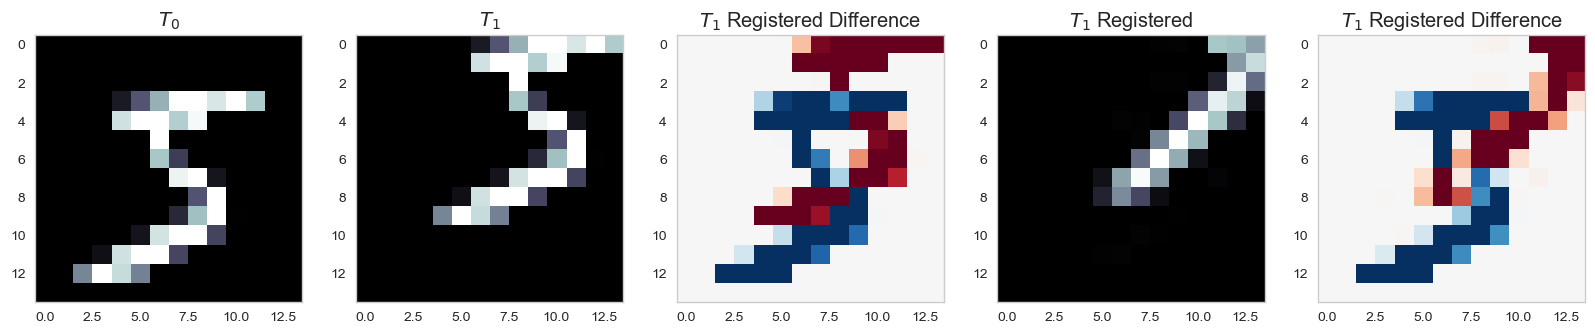

In [48]:
%matplotlib inline
reg_img = register_img(bw_img, shift_img, brute_force=False, use_mse=True)
print(reg_img.max(), bw_img.max())
fig, (ax1, ax2, ax2d, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 5), dpi=100)
ax1.imshow(bw_img, cmap='bone')
ax1.set_title('$T_0$')
ax2.imshow(shift_img, cmap='bone')
ax2.set_title('$T_1$')
ax2d.imshow(1.0*bw_img-shift_img, cmap='RdBu', vmin=-100, vmax=100)
ax2d.set_title('$T_1$ Registered Difference')
ax3.imshow(reg_img, cmap='bone')
ax3.set_title('$T_1$ Registered')
ax4.imshow(1.0*bw_img-reg_img, cmap='RdBu', vmin=-127, vmax=127)
ax4.set_title('$T_1$ Registered Difference');

## Subdividing the data

We can approach the problem by subdividing the data into smaller blocks and then apply the digital volume correlation independently to each block.
- information on changes in different regions
- less statistics than a larger box

# Introducing Physics


DIC or DVC by themselves include no _sanity check_ for realistic offsets in the correlation itself. The method can, however be integrated with physical models to find a more optimal solutions.

- information from surrounding points
- smoothness criteria
- maximum deformation / force
- material properties



$$ C_{\textrm{cost}} = \underbrace{C_{I_0,I_1}(\vec{r})}_{\textrm{Correlation Term}} + \underbrace{\lambda ||\vec{r}||}_{\textrm{deformation term}} $$

## Distribution Metrics


As we covered before distribution metrics like the distribution tensor can be used for tracking changes inside a sample. Of these the most relevant is the texture tensor from cellular materials and liquid foam. The texture tensor is the same as the distribution tensor except that the edges (or faces) represent physically connected / touching objects rather than touching Voronoi faces (or conversely Delaunay triangles).

These metrics can also be used for tracking the behavior of a system without tracking the single points since most deformations of a system also deform the distribution tensor and can thus be extracted by comparing the distribution tensor at different time steps. 

## Quantifying Deformation: Strain 


We can take any of these approaches and quantify the deformation using a tool called the strain tensor. 

Strain is defined in mechanics for the simple 1D case as the change in the length against the change in the original length.

$$ e = \frac{\Delta L}{L} $$ 

While this defines the 1D case well, it is difficult to apply such metrics to voxel, shape, and tensor data. 

## Strain Tensor

There are a number of different ways to calculate strain and the strain tensor, but the most applicable for general image based applications is called the [infinitesimal strain tensor](http://en.wikipedia.org/wiki/Infinitesimal_strain_theory), because the element matches well to square pixels and cubic voxels.

<img src="figures/2D_geometric_strain.svg" style="height:500px" />


```{figure} figures/2D_geometric_strain.pdf
---
---
Deformation by strain.
```

## Types of Strain

We catagorize the types of strain into two main catagories:

$$ \underbrace{\mathbf{E}}_{\textrm{Total Strain}} = \underbrace{\varepsilon_M \mathbf{I_3}}_{\textrm{Volumetric}} + \underbrace{\mathbf{E}^\prime}_{\textrm{Deviatoric}} $$

### Volumetric / Dilational

The isotropic change in size or scale of the object. 

### Deviatoric

The change in the proportions of the object (similar to anisotropy) independent of the final scale



# Two Point Correlation - Volcanic Rock


__Data provided by Mattia Pistone and Julie Fife__

The air phase changes from small very anisotropic bubbles to one large connected pore network. 
- The same tools cannot be used to quantify those systems. 
- Furthermore there are motion artifacts which are difficult to correct.

<video controls src="movies/roicurv.m4v" type="video/m4v">
Your browser does not support the video tag.
</video>

We can utilize the two point correlation function of the material to characterize the shape generically for each time step and then compare.

<video controls src="movies/rdfanim.m4v" type="video/m4v">
Your browser does not support the video tag.
</video>

# Summary

- Dynamic experiments
- Object tracking
- Registration
- Digital volume correlation (DIC)